# Instalar librerias

In [2]:
%pip install jupyter numpy pandas matplotlib seaborn scikit-learn tensorflow torch 


Note: you may need to restart the kernel to use updated packages.


# Cargar librerías necesarias

In [23]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

## Cargar los datos

In [4]:

file_path = "../100_Batches_IndPenSim_V3.csv"
df = pd.read_csv(file_path)
print(df.head())

   Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0       0.2                     30                    100   
1       0.4                     30                    100   
2       0.6                     30                    100   
3       0.8                     30                    100   
4       1.0                     30                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        8                  0.0000                  30.118   
1                        8                  0.0000                  51.221   
2                        8                  0.0000                  54.302   
3                        8                  0.0000                  37.816   
4                        8                  0.5181                  18.908   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   9.8335                           0.0001   
1     

In [5]:

# Mostrar información básica
print(df.info())  # Ver número de columnas y tipos de datos
print(df.describe())  # Estadísticas generales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB
None
            Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
count  113935.000000          113935.000000               113935.0   
mean      114.750656              65.246360                  100.0   
std        66.990504              11.690215                    0.0   
min         0.200000              20.000000                  100.0   
25%        57.000000              60.000000                  100.0   
50%       114.000000              65.000000                  100.0   
75%       171.000000              75.000000                  100.0   
max       290.000000              75.000000                  100.0   

       Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  \
count            113935.000000           113935.000000   
mean                 76.663764                0.073209   
std                

## Análisis Bivariado

In [6]:
print(df.columns.tolist()) 


['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))', 'Carbon evolution rate(CER:g/h)', 

In [7]:
# Seleccionar la variable objetivo y los features relevantes
target_variable = 'Penicillin concentration(P:g/L)'

In [8]:
features = [
    'Time (h)',
    'Aeration rate(Fg:L/h)',
    'Agitator RPM(RPM:RPM)',
    'Sugar feed rate(Fs:L/h)',
    'Acid flow rate(Fa:L/h)',
    'Base flow rate(Fb:L/h)',
    'Heating/cooling water flow rate(Fc:L/h)',
    'Water for injection/dilution(Fw:L/h)',
    'Air head pressure(pressure:bar)',
    'Dumped broth flow(Fremoved:L/h)',
    'Substrate concentration(S:g/L)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'pH(pH:pH)',
    'Temperature(T:K)',
    'Carbon evolution rate(CER:g/h)',
    'carbon dioxide percent in off-gas(CO2outgas:%)',
    'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
    'Oil flow(Foil:L/hr)',
    'PAA flow(Fpaa:PAA flow (L/h))',
    'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
    'Ammonia shots(NH3_shots:kgs)',
    'Vessel Weight(Wt:Kg)',
    'Vessel Volume(V:L)',
    'Oxygen Uptake Rate(OUR:(g min^{-1}))',
    'Oxygen in percent in off-gas(O2:O2  (%))',
    'Viscosity(Viscosity_offline:centPoise)',
    'Generated heat(Q:kJ)'
]

In [9]:
# Filtrar el DataFrame solo con las columnas necesarias
df_biv = df[[target_variable] + features].dropna()

In [10]:
# Matriz de correlación con coeficiente de Pearson
pearson_corr = df_biv.corr(method='pearson')

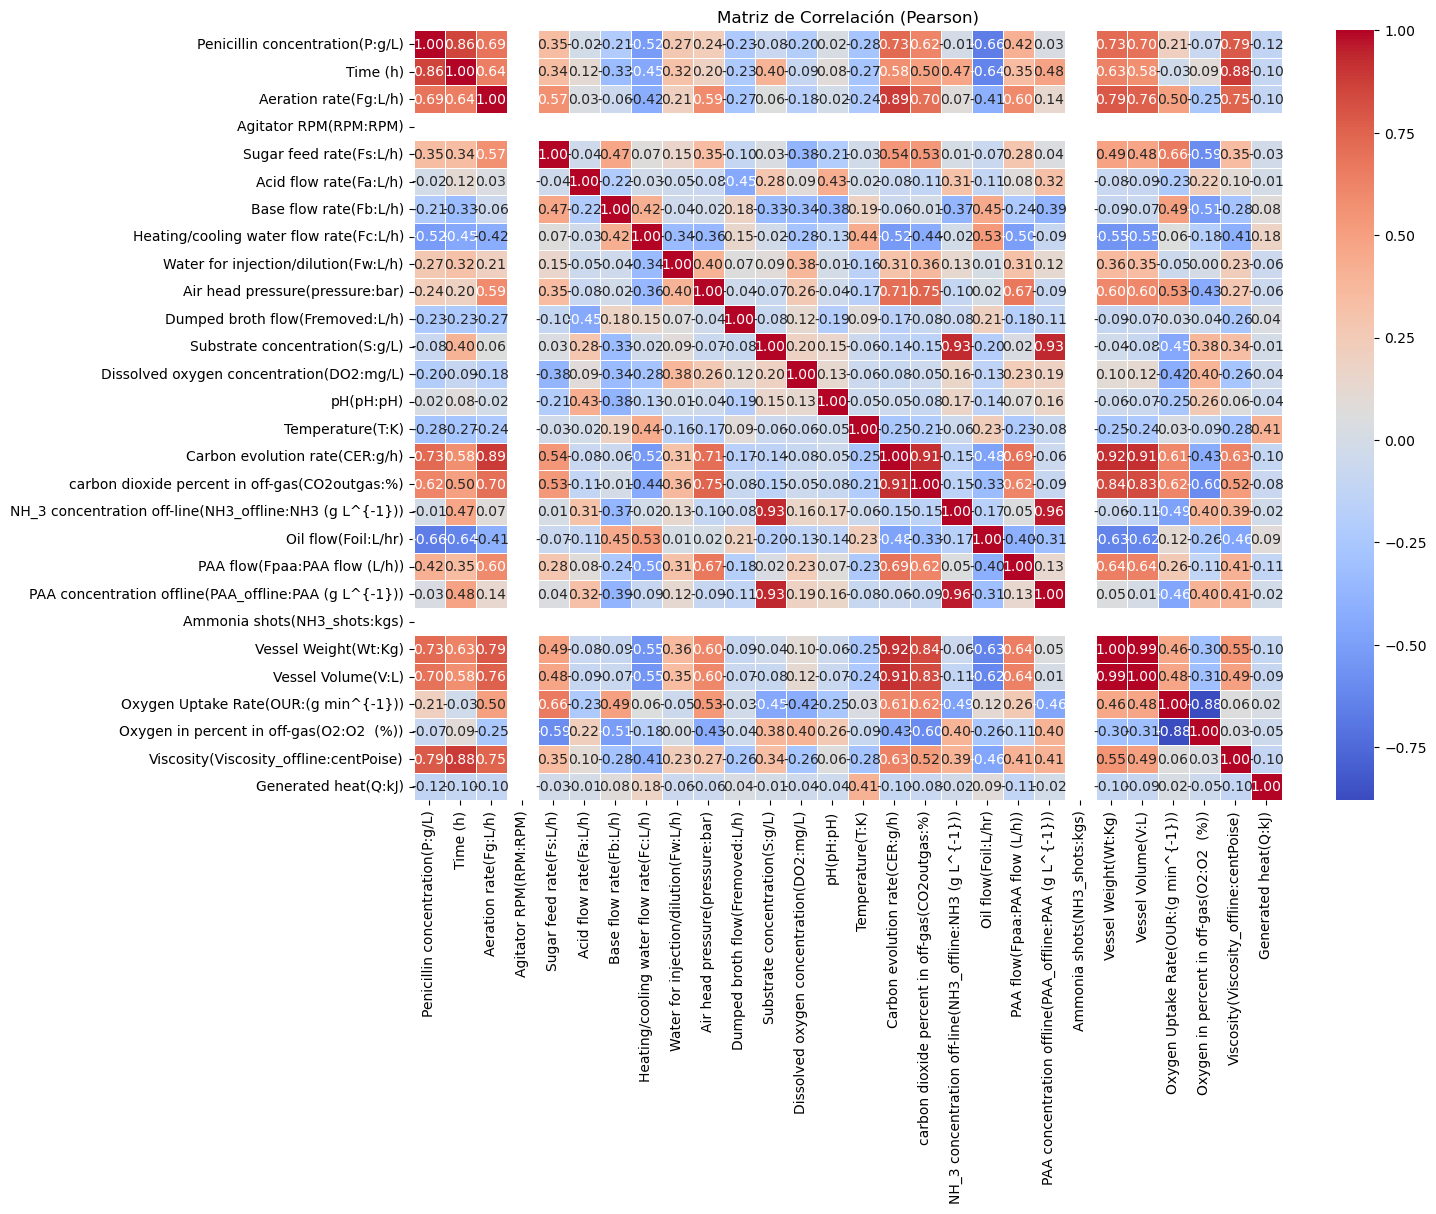

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación (Pearson)")
plt.show()

In [12]:
spearman_corr = df_biv.corr(method='spearman')
target_corr_spearman = spearman_corr[target_variable].drop(target_variable)
print("Correlaciones de Spearman con la variable objetivo:")
print(target_corr_spearman.sort_values(ascending=False))

Correlaciones de Spearman con la variable objetivo:
Time (h)                                                   0.861494
Viscosity(Viscosity_offline:centPoise)                     0.776702
Aeration rate(Fg:L/h)                                      0.727366
Carbon evolution rate(CER:g/h)                             0.661515
Vessel Weight(Wt:Kg)                                       0.628299
Vessel Volume(V:L)                                         0.599427
carbon dioxide percent in off-gas(CO2outgas:%)             0.562936
Water for injection/dilution(Fw:L/h)                       0.486231
PAA flow(Fpaa:PAA flow (L/h))                              0.316539
Sugar feed rate(Fs:L/h)                                    0.288313
PAA concentration offline(PAA_offline:PAA (g L^{-1}))      0.182016
pH(pH:pH)                                                  0.120580
Oxygen Uptake Rate(OUR:(g min^{-1}))                       0.094429
Oxygen in percent in off-gas(O2:O2  (%))                   0.064

In [13]:
target_corr_pearson = pearson_corr[target_variable].drop(target_variable)
top10_features = target_corr_pearson.abs().sort_values(ascending=False).head(10).index.tolist()
print("\nTop 5 features (según correlación absoluta de Pearson) con la variable objetivo:")
print(top10_features)


Top 5 features (según correlación absoluta de Pearson) con la variable objetivo:
['Time (h)', 'Viscosity(Viscosity_offline:centPoise)', 'Carbon evolution rate(CER:g/h)', 'Vessel Weight(Wt:Kg)', 'Vessel Volume(V:L)', 'Aeration rate(Fg:L/h)', 'Oil flow(Foil:L/hr)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Heating/cooling water flow rate(Fc:L/h)', 'PAA flow(Fpaa:PAA flow (L/h))']


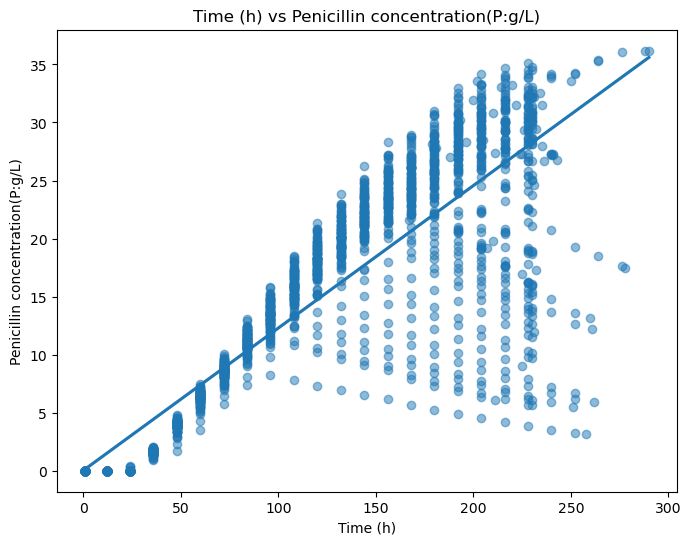

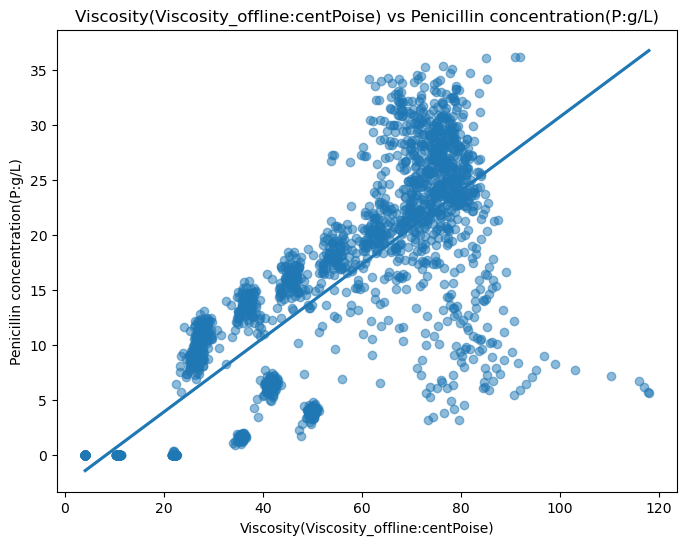

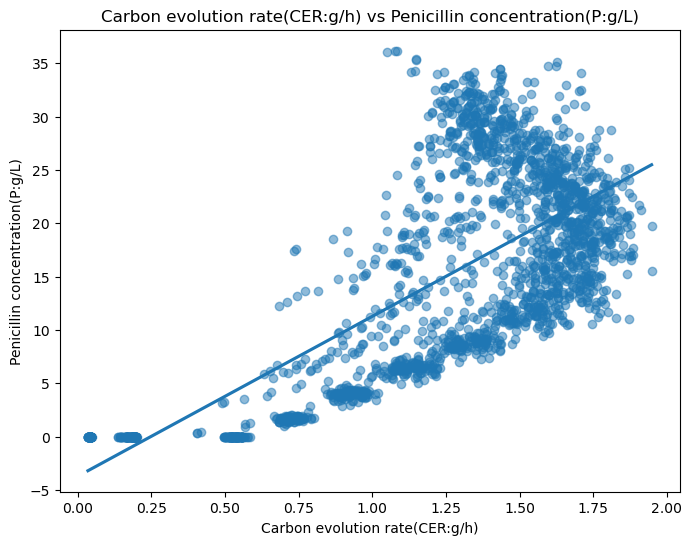

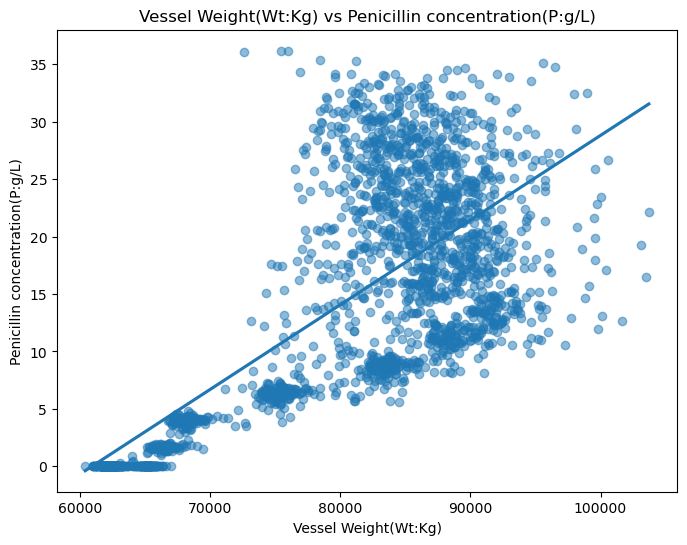

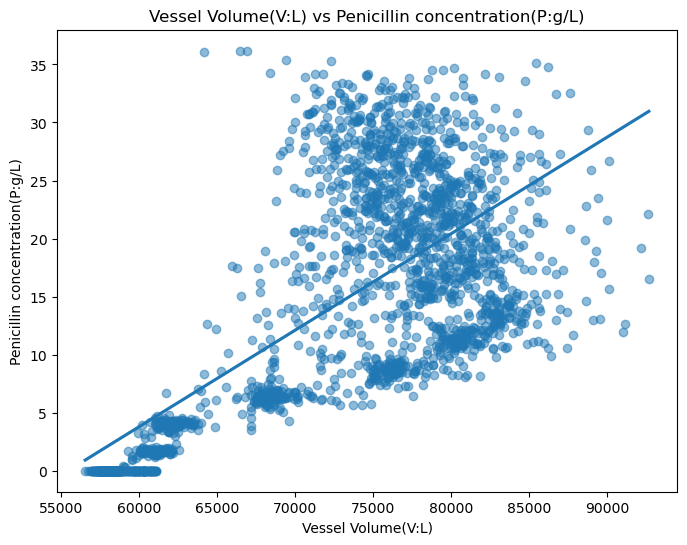

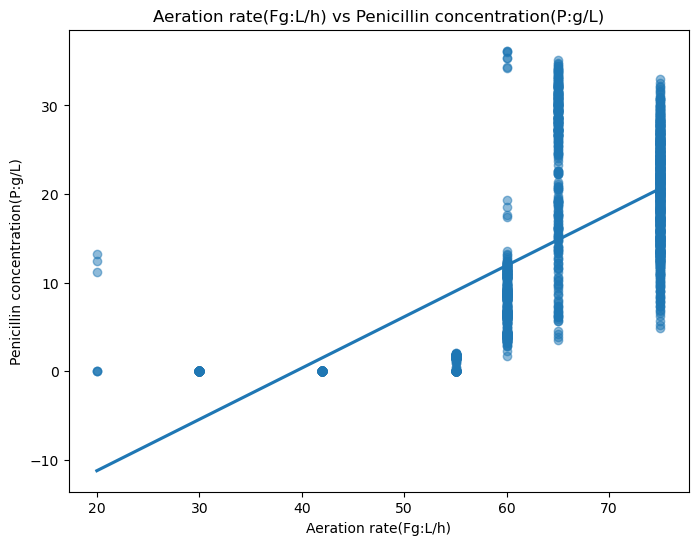

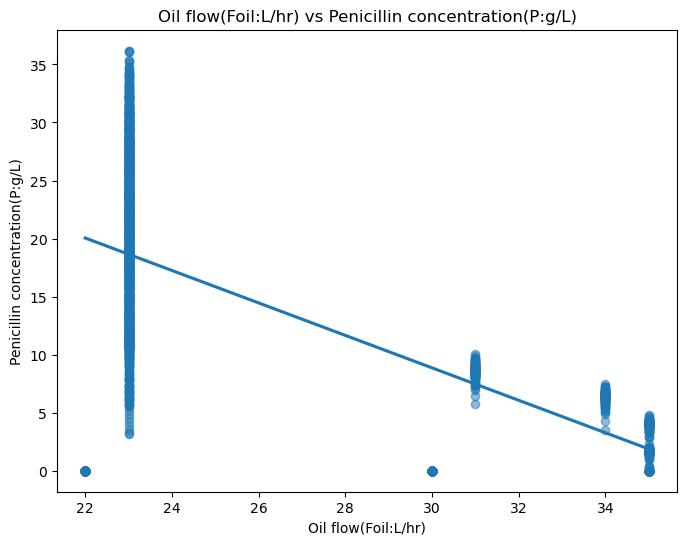

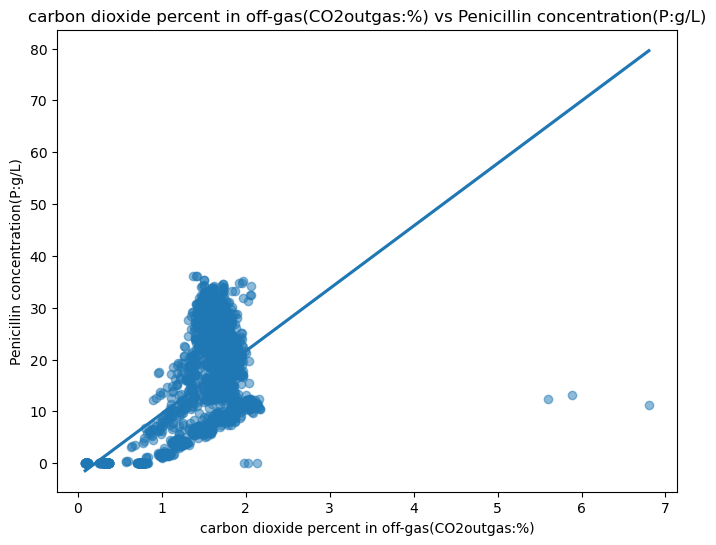

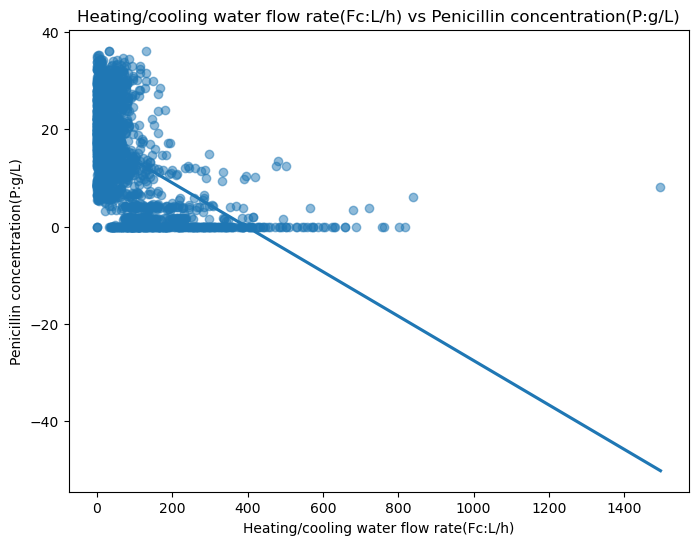

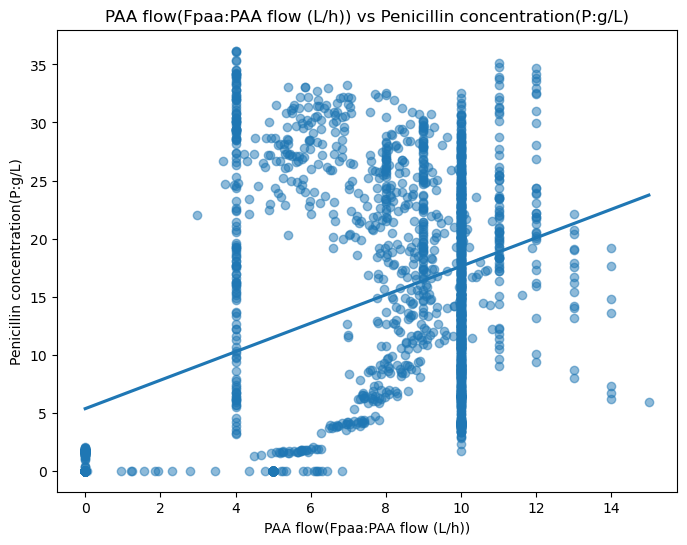

In [ ]:
for feat in top10_features:
    plt.figure(figsize=(8,6))
    sns.regplot(x=df_biv[feat], y=df_biv[target_variable], ci=None, scatter_kws={'alpha':0.5})
    plt.title(f"{feat} vs {target_variable}")
    plt.xlabel(feat)
    plt.ylabel(target_variable)
    plt.show()

In [16]:
spearman_corr = df_biv.corr(method='spearman')
target_corr_spearman = spearman_corr[target_variable].drop(target_variable)
print("Correlaciones de Spearman con Penicillin concentration:")
print(target_corr_spearman.sort_values(ascending=False))

Correlaciones de Spearman con Penicillin concentration:
Time (h)                                                   0.861494
Viscosity(Viscosity_offline:centPoise)                     0.776702
Aeration rate(Fg:L/h)                                      0.727366
Carbon evolution rate(CER:g/h)                             0.661515
Vessel Weight(Wt:Kg)                                       0.628299
Vessel Volume(V:L)                                         0.599427
carbon dioxide percent in off-gas(CO2outgas:%)             0.562936
Water for injection/dilution(Fw:L/h)                       0.486231
PAA flow(Fpaa:PAA flow (L/h))                              0.316539
Sugar feed rate(Fs:L/h)                                    0.288313
PAA concentration offline(PAA_offline:PAA (g L^{-1}))      0.182016
pH(pH:pH)                                                  0.120580
Oxygen Uptake Rate(OUR:(g min^{-1}))                       0.094429
Oxygen in percent in off-gas(O2:O2  (%))                   0

In [ ]:
# =============================================================================
# 1. Selección de variables
# Según los artículos, los drivers críticos del proceso son las variables 
# operativas (alimentación, oxígeno, pH, temperatura, viscosidad, peso, etc.).
# Se excluye "Time (h)" para centrarse en los parámetros de proceso.
# =============================================================================

target_variable = 'Penicillin concentration(P:g/L)'
process_features = [
    'Aeration rate(Fg:L/h)',
    'Sugar feed rate(Fs:L/h)',
    'PAA flow(Fpaa:PAA flow (L/h))',
    'Substrate concentration(S:g/L)',
    'Dissolved oxygen concentration(DO2:mg/L)',
    'pH(pH:pH)',
    'Temperature(T:K)',
    'Vessel Weight(Wt:Kg)',
    'Viscosity(Viscosity_offline:centPoise)',
    'Oil flow(Foil:L/hr)'
]

In [18]:
df_biv = df[[target_variable] + process_features].dropna()

In [19]:
spearman_corr = df_biv.corr(method='spearman')
target_corr_spearman = spearman_corr[target_variable].drop(target_variable)
print("Correlaciones de Spearman con Penicillin concentration:")
print(target_corr_spearman.sort_values(ascending=False))

Correlaciones de Spearman con Penicillin concentration:
Viscosity(Viscosity_offline:centPoise)      0.776702
Aeration rate(Fg:L/h)                       0.727366
Vessel Weight(Wt:Kg)                        0.628299
PAA flow(Fpaa:PAA flow (L/h))               0.316539
Sugar feed rate(Fs:L/h)                     0.288313
pH(pH:pH)                                   0.120580
Dissolved oxygen concentration(DO2:mg/L)   -0.249582
Temperature(T:K)                           -0.437881
Substrate concentration(S:g/L)             -0.464212
Oil flow(Foil:L/hr)                        -0.536624
Name: Penicillin concentration(P:g/L), dtype: float64


In [20]:
# Convertir las features y la variable objetivo a numérico (si no lo son ya)
X_numeric = df_biv[process_features].apply(pd.to_numeric, errors='coerce')
y_numeric = df_biv[target_variable].apply(pd.to_numeric, errors='coerce')
X_numeric = X_numeric.loc[y_numeric.index]

In [24]:
mi_scores = mutual_info_regression(X_numeric, y_numeric, random_state=0)
mi_series = pd.Series(mi_scores, index=X_numeric.columns).sort_values(ascending=False)
print("\nInformación Mutua entre cada variable de proceso y Penicillin concentration:")
print(mi_series)


Información Mutua entre cada variable de proceso y Penicillin concentration:
Viscosity(Viscosity_offline:centPoise)      1.420354
Sugar feed rate(Fs:L/h)                     1.353252
Aeration rate(Fg:L/h)                       1.083491
Oil flow(Foil:L/hr)                         1.030400
Vessel Weight(Wt:Kg)                        0.964392
PAA flow(Fpaa:PAA flow (L/h))               0.735198
Dissolved oxygen concentration(DO2:mg/L)    0.461571
Substrate concentration(S:g/L)              0.447623
Temperature(T:K)                            0.273886
pH(pH:pH)                                   0.199129
dtype: float64


/home/felipe/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


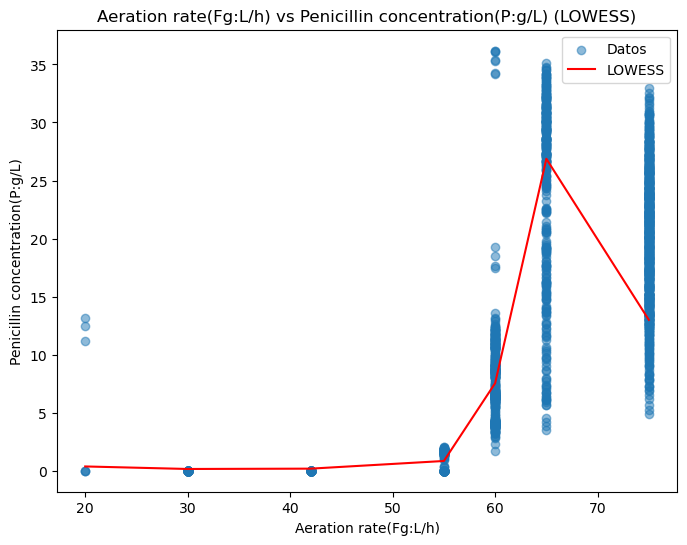

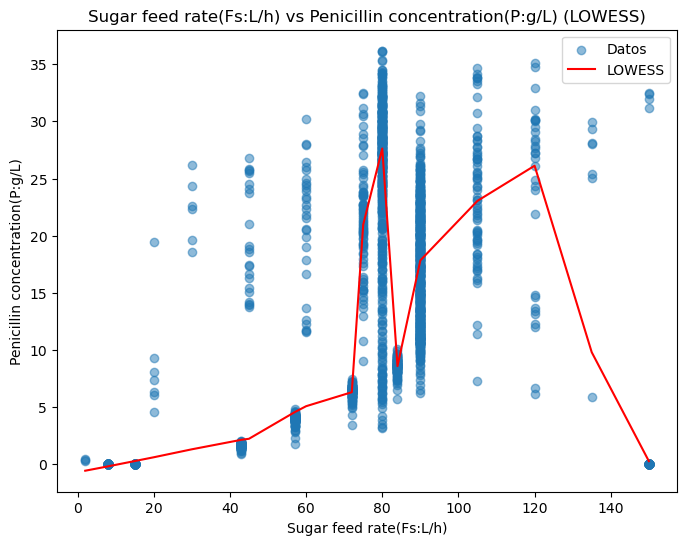

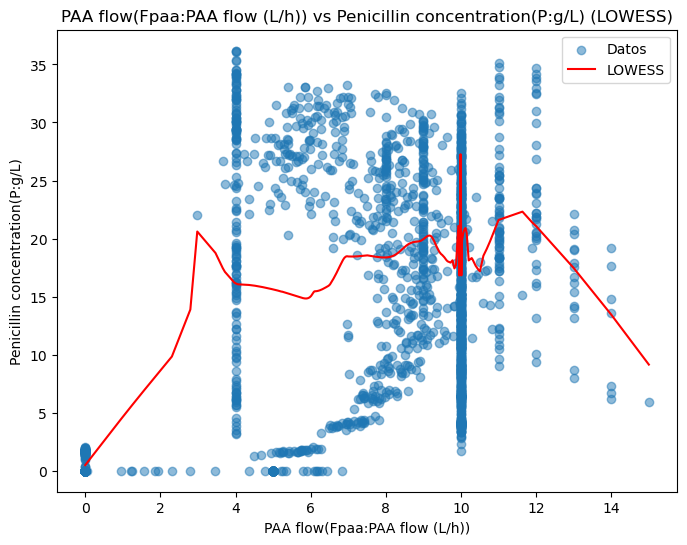

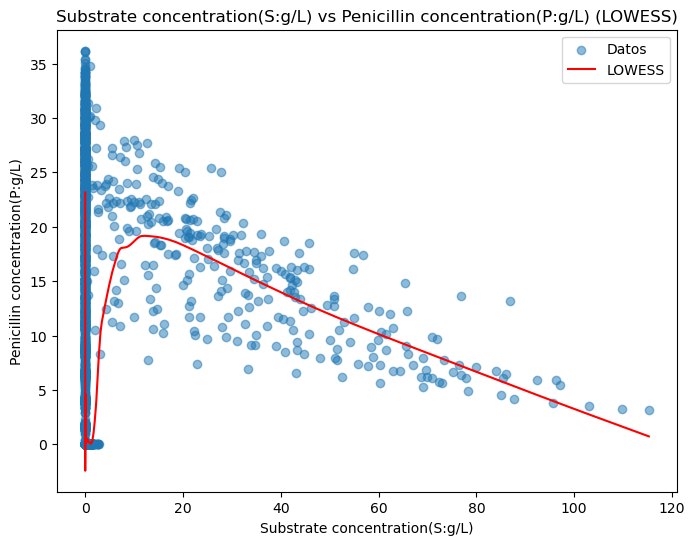

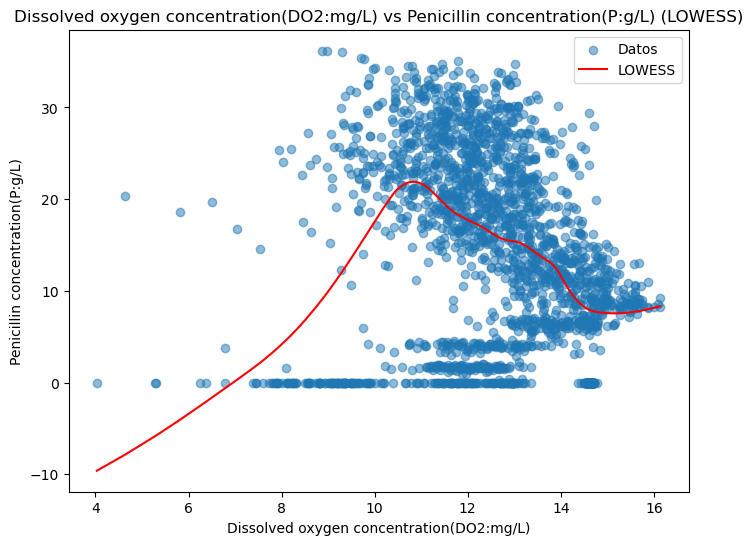

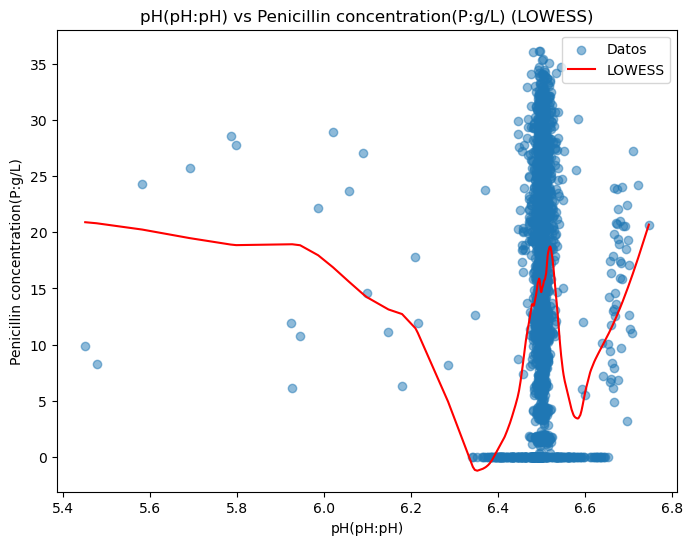

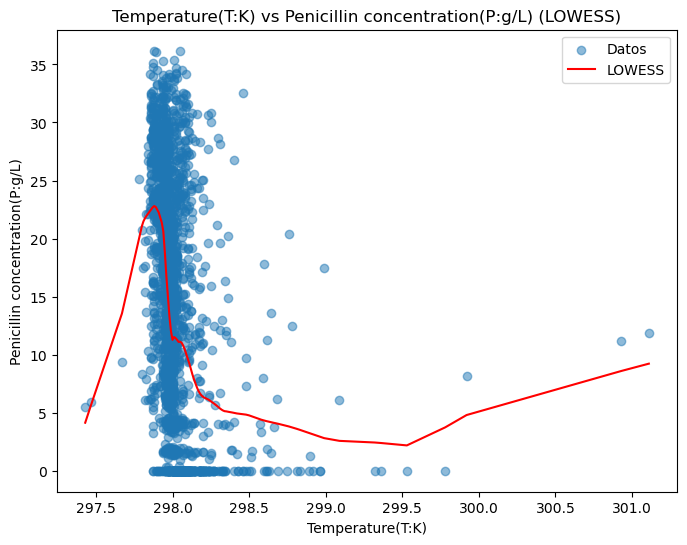

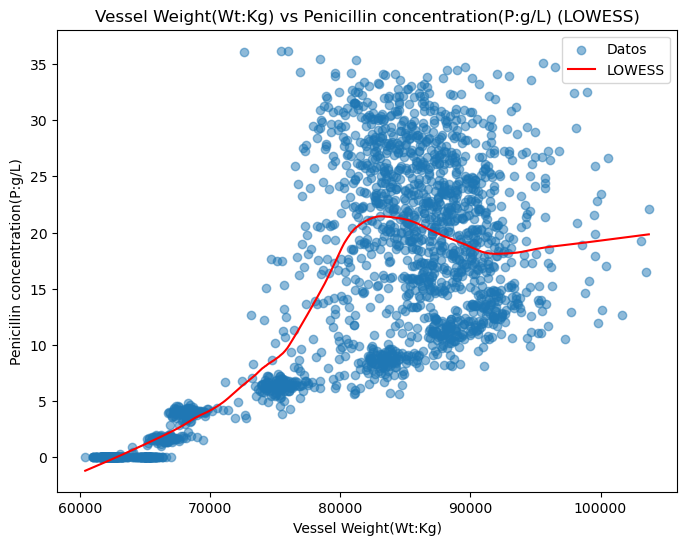

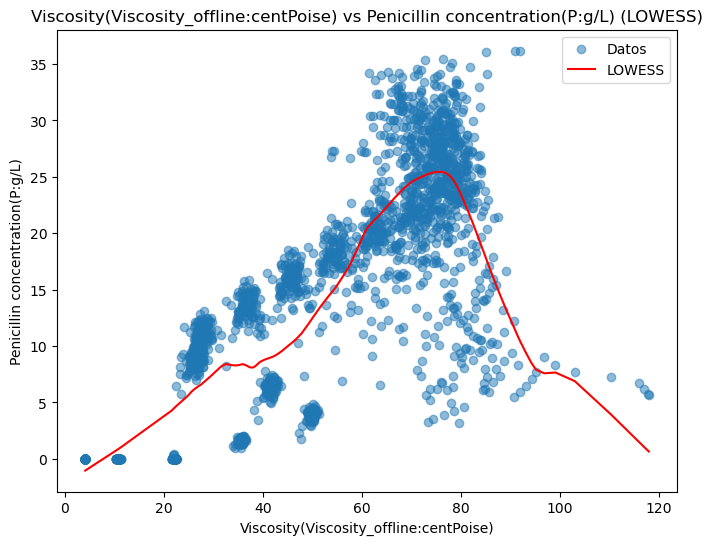

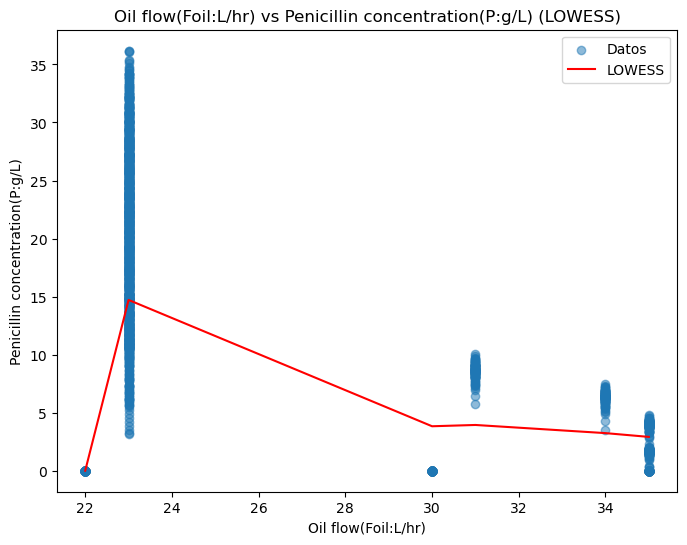

In [25]:
# =============================================================================
# 3. Visualización bivariada: Gráficos de dispersión con LOWESS smoothing
# LOWESS permite capturar tendencias no lineales sin asumir un modelo paramétrico.
# =============================================================================
for feat in process_features:
    plt.figure(figsize=(8,6))
    x = df_biv[feat]
    y = df_biv[target_variable]
    # Calcular línea de suavizado LOWESS; el parámetro frac controla la cantidad de suavizado.
    smoothed = lowess(y, x, frac=0.3)
    plt.scatter(x, y, alpha=0.5, label="Datos")
    plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', label="LOWESS")
    plt.title(f"{feat} vs {target_variable} (LOWESS)")
    plt.xlabel(feat)
    plt.ylabel(target_variable)
    plt.legend()
    plt.show()

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


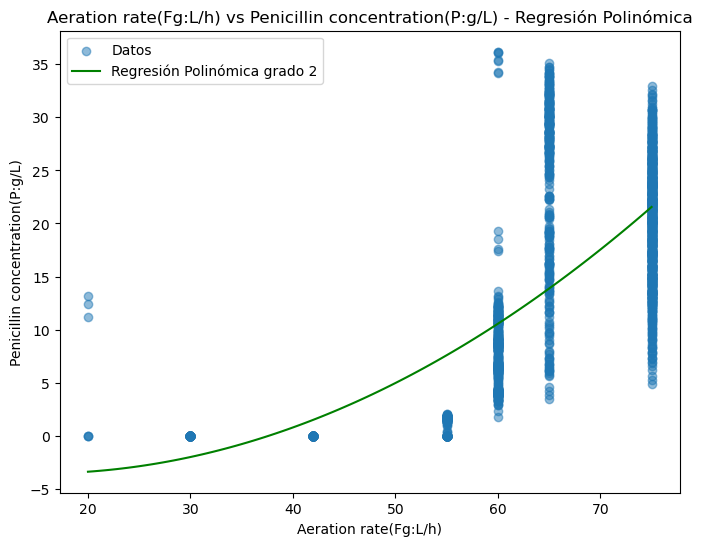

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


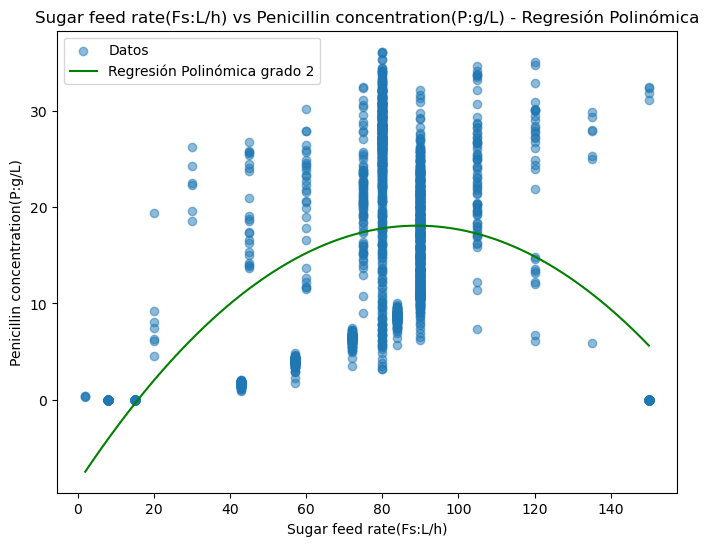

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


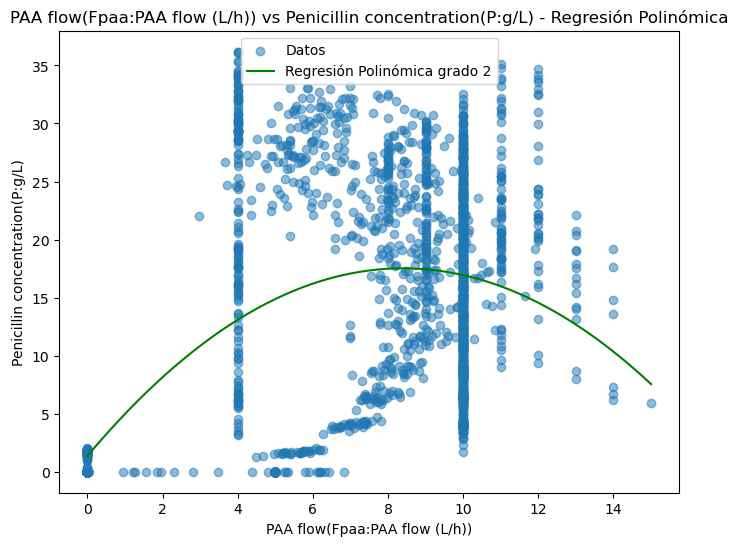

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


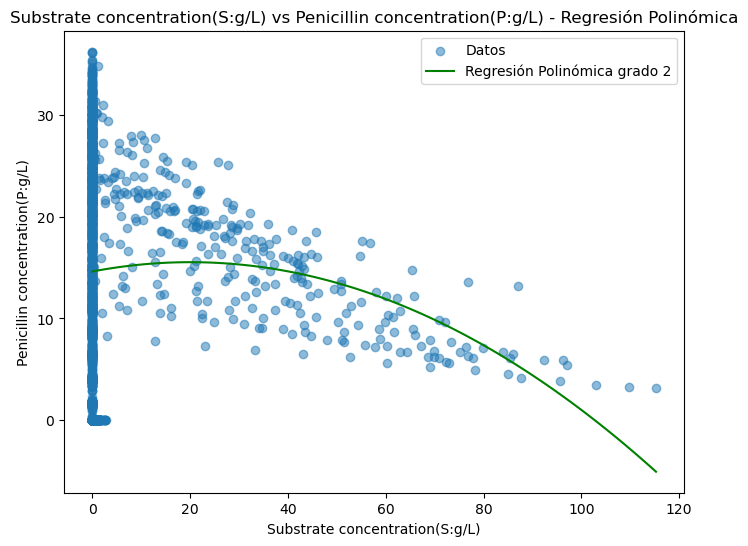

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


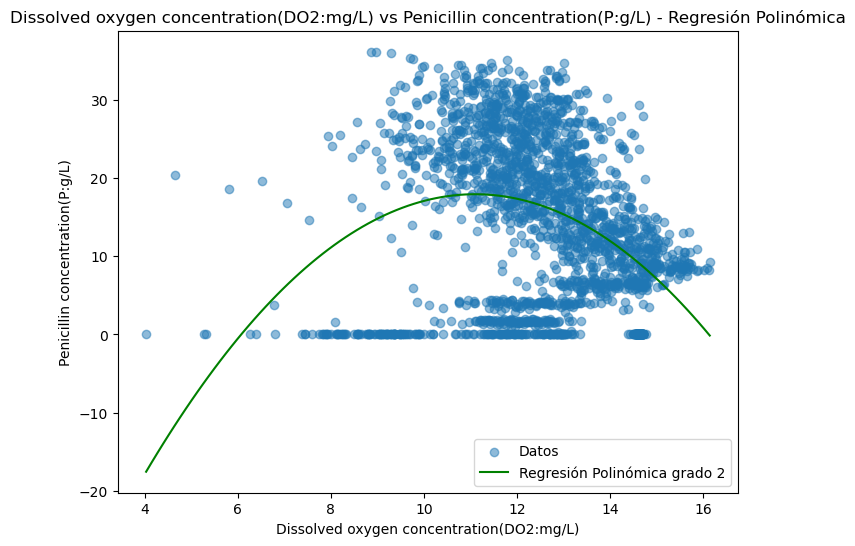

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


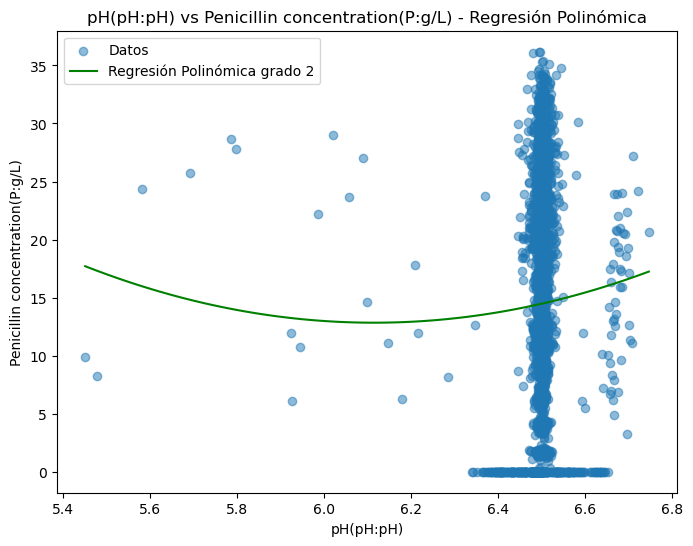

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


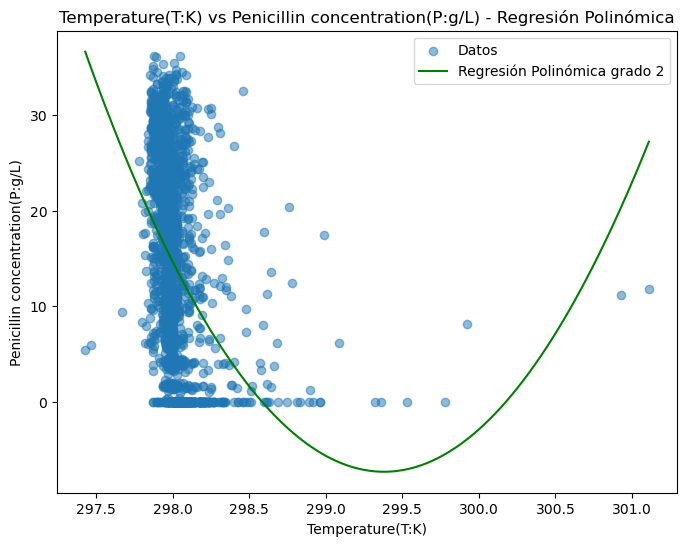

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


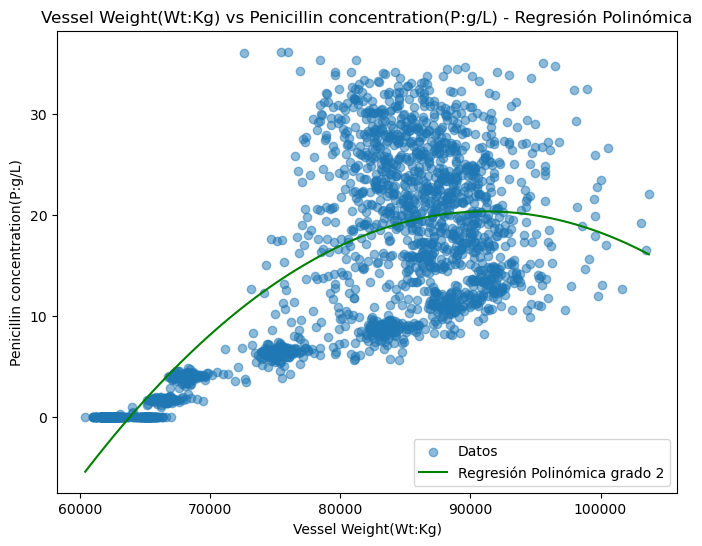

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


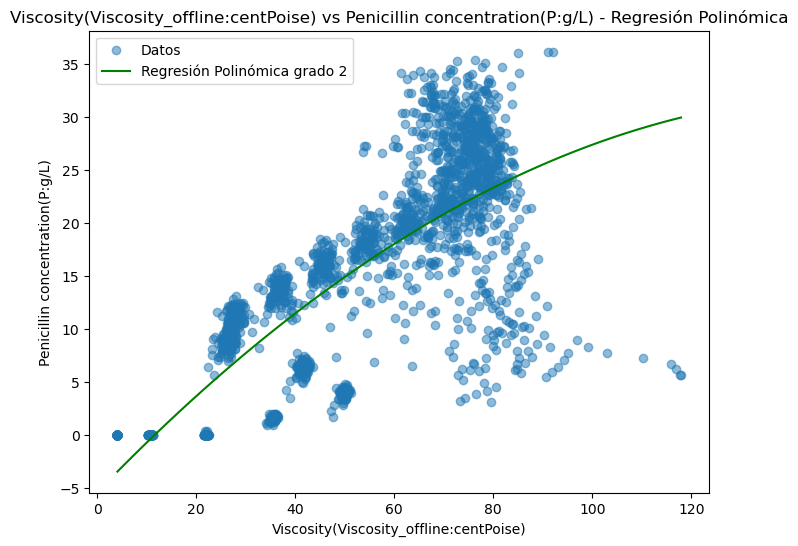

/home/felipe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


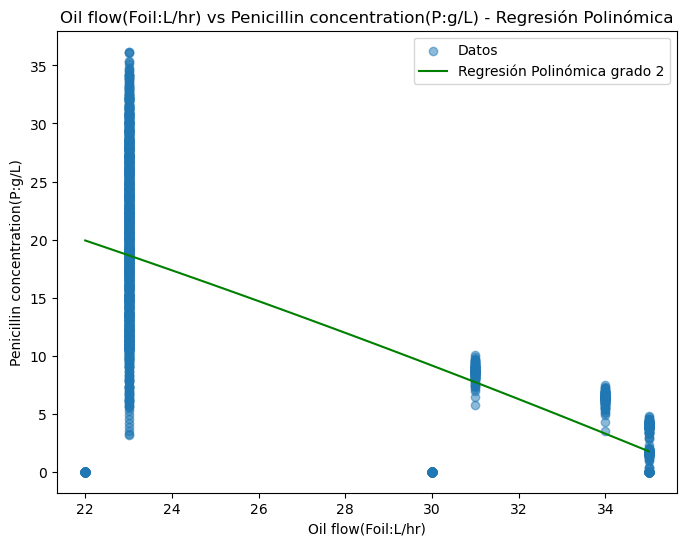

In [27]:
# =============================================================================
# 4. Ejemplo de ajuste de regresión polinómica
# Esto es útil para cuantificar la relación no lineal para una variable específica.
# Aquí se ajusta un modelo polinómico de grado 2 para la primera variable de proceso.
# =============================================================================
for feat in process_features:
    # Extraer la variable feature y la variable objetivo
    X_poly = df_biv[[feat]]
    y_poly = df_biv[target_variable]
    
    # Ajustar un modelo polinómico de grado 2
    poly = PolynomialFeatures(degree=2)
    X_poly_transformed = poly.fit_transform(X_poly)
    model_poly = LinearRegression().fit(X_poly_transformed, y_poly)
    
    # Crear un rango de valores para graficar la curva ajustada
    x_range = np.linspace(X_poly.min(), X_poly.max(), 100).reshape(-1, 1)
    x_range_transformed = poly.transform(x_range)
    y_poly_pred = model_poly.predict(x_range_transformed)
    
    # Graficar los datos y la curva ajustada
    plt.figure(figsize=(8,6))
    plt.scatter(X_poly, y_poly, alpha=0.5, label="Datos")
    plt.plot(x_range, y_poly_pred, color='green', label="Regresión Polinómica grado 2")
    plt.title(f"{feat} vs {target_variable} - Regresión Polinómica")
    plt.xlabel(feat)
    plt.ylabel(target_variable)
    plt.legend()
    plt.show()

### Validar valores nulos

In [ ]:


def validar_nulos(df):
    """
    Función para validar la cantidad de valores nulos en cada columna de un DataFrame.
    
    Parámetros:
    df (pd.DataFrame): DataFrame a analizar.

    Retorna:
    pd.DataFrame: DataFrame con el número y porcentaje de valores nulos por columna.
    """
    # Contar valores nulos por columna
    nulos = df.isnull().sum()

    # Calcular el porcentaje de valores nulos
    porcentaje_nulos = (nulos / len(df)) * 100

    # Crear un DataFrame con los resultados
    resultado = pd.DataFrame({'Valores Nulos': nulos, 'Porcentaje (%)': porcentaje_nulos})

    # Filtrar solo columnas con valores nulos
    resultado = resultado[resultado['Valores Nulos'] > 0].sort_values(by="Valores Nulos", ascending=False)

    if resultado.empty:
        print(" No hay valores nulos en el DataFrame.")
    else:
        print(" Columnas con valores nulos:")
        print(resultado)

    return resultado


In [ ]:
resultado_nulos = validar_nulos(df)

 Columnas con valores nulos:
                                                    Valores Nulos  \
PAA concentration offline(PAA_offline:PAA (g L^...         111873   
NH_3 concentration off-line(NH3_offline:NH3 (g ...         111873   
Offline Penicillin concentration(P_offline:P(g ...         111873   
Offline Biomass concentratio(X_offline:X(g L^{-...         111873   
Viscosity(Viscosity_offline:centPoise)                     111873   

                                                    Porcentaje (%)  
PAA concentration offline(PAA_offline:PAA (g L^...       98.190196  
NH_3 concentration off-line(NH3_offline:NH3 (g ...       98.190196  
Offline Penicillin concentration(P_offline:P(g ...       98.190196  
Offline Biomass concentratio(X_offline:X(g L^{-...       98.190196  
Viscosity(Viscosity_offline:centPoise)                   98.190196  



 **Interpretación**
- **`Valores Nulos`**: Número total de valores nulos en cada columna.
- **`Porcentaje (%)`**: Proporción de valores nulos respecto al total de filas del dataset.

En este caso:
- Las columnas como **`PAA concentration offline`, `NH_3 concentration off-line`, `Offline Penicillin concentration`**, etc., **tienen 111,873 valores nulos**.
- Esto representa **el 98.19%** de los datos en esas columnas, lo cual es extremadamente alto.

**¿Qué significa esto?**
- **Posibles causas**:
  1. **Datos faltantes en la recopilación**: Estas mediciones pueden haber sido omitidas en varias simulaciones.
  2. **Errores en el dataset**: Puede que el dataset no tenga bien registradas estas mediciones.
  3. **No aplicable en todas las observaciones**: Algunas variables pueden ser medidas solo en ciertos lotes.


### Valores únicos por variables

In [ ]:


# Crear un DataFrame con los valores únicos por variable
unique_values = pd.DataFrame({'Variable': df.columns, 'Valores Únicos': [df[col].nunique() for col in df.columns]})

# Ordenar de mayor a menor cantidad de valores únicos
unique_values = unique_values.sort_values(by="Valores Únicos", ascending=False)

# Mostrar el DataFrame
print(unique_values)




                                             Variable  Valores Únicos
6             Heating/cooling water flow rate(Fc:L/h)           77380
5                              Base flow rate(Fb:L/h)           67206
11                     Substrate concentration(S:g/L)           64531
13                    Penicillin concentration(P:g/L)           56258
7                     Heating water flow rate(Fh:L/h)           54534
18                               Generated heat(Q:kJ)           51059
24               Oxygen Uptake Rate(OUR:(g min^{-1}))           35065
28                     Carbon evolution rate(CER:g/h)           35059
15                               Vessel Weight(Wt:Kg)           31711
19     carbon dioxide percent in off-gas(CO2outgas:%)           28416
14                                 Vessel Volume(V:L)           28296
20                      PAA flow(Fpaa:PAA flow (L/h))           22931
12           Dissolved oxygen concentration(DO2:mg/L)           11087
16                  

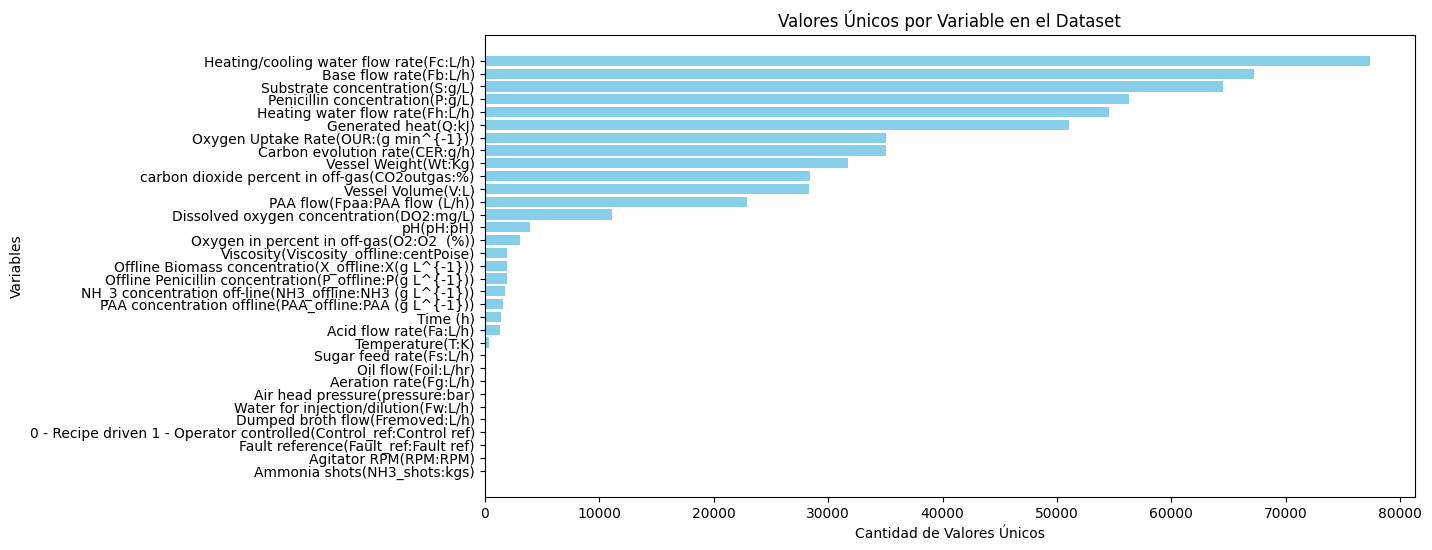

In [ ]:
import matplotlib.pyplot as plt

# Configurar tamaño de la figura
plt.figure(figsize=(12, 6))

# Graficar valores únicos por columna
plt.barh(unique_values["Variable"], unique_values["Valores Únicos"], color="skyblue")
plt.xlabel("Cantidad de Valores Únicos")
plt.ylabel("Variables")
plt.title("Valores Únicos por Variable en el Dataset")
plt.gca().invert_yaxis()  # Invertir el eje para mejor visualización
plt.show()


### Identificar lotes iniciales y finales 

In [ ]:


def find_batch_start_indices(df, time_value=0.2):
    """
    Encuentra los índices donde la columna `Time (h)` es igual a `time_value`.

    Args:
        df (pd.DataFrame): DataFrame con la columna 'Time (h)'.
        time_value (float): Valor de tiempo que indica el inicio de un lote (por defecto 0.2).

    Returns:
        pd.Index: Índices de las filas donde 'Time (h)' == time_value.
    """
    return df[df['Time (h)'] == time_value].index


def find_batch_end_indices(df, time_value=0.2):
    """
    Encuentra los índices de finalización de los lotes.

    Args:
        df (pd.DataFrame): DataFrame con la columna 'Time (h)'.
        time_value (float): Valor de tiempo que indica el inicio de un lote (por defecto 0.2).

    Returns:
        pd.Index: Índices de las filas que representan el final de cada lote.
    """
    batch_start_indices = find_batch_start_indices(df, time_value)

    # Obtener índices inmediatamente anteriores a 0.2 (fin del lote anterior)
    batch_end_indices = batch_start_indices - 1

    # Filtrar valores negativos
    batch_end_indices = batch_end_indices[batch_end_indices >= 0]

    # Agregar el último índice del DataFrame como fin del último lote
    batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))

    return batch_end_indices


# Llamar a las funciones
batch_start_indices = find_batch_start_indices(df)
batch_end_indices = find_batch_end_indices(df)

# Mostrar resultados
print(f" Índices de inicio de los lotes:\n{batch_start_indices}")
print(f"\n Índices de fin de los lotes:\n{batch_end_indices}")


 Índices de inicio de los lotes:
Index([     0,   1130,   2280,   3670,   4820,   5715,   6865,   8025,   9175,
        10435,  11585,  12595,  13745,  14825,  15975,  16880,  18030,  18970,
        20120,  21155,  22305,  23445,  24595,  25915,  27065,  28370,  29520,
        30575,  31725,  33175,  34325,  35575,  36725,  38025,  39175,  40155,
        41305,  42355,  43505,  44680,  45830,  47045,  48195,  49350,  50500,
        51810,  52960,  54100,  55250,  56410,  57560,  58685,  59835,  60800,
        61950,  63070,  64220,  65390,  66540,  67560,  68710,  69915,  71065,
        72215,  73365,  74520,  75670,  76505,  77655,  78780,  79930,  81000,
        82150,  83330,  84480,  85440,  86590,  87615,  88765,  89940,  91090,
        92190,  93340,  94545,  95695,  96695,  97845,  98955, 100105, 101260,
       102410, 103700, 104850, 105900, 107050, 108105, 109255, 110380, 111530,
       112785],
      dtype='int64')

 Índices de fin de los lotes:
Index([  1129,   2279,   3669,

In [ ]:
# Verificar si hay índices de fin de lote válidos
if not batch_end_indices.empty:
    # Extraer los resultados en los índices finales de cada lote
    results_df = df.iloc[batch_end_indices].copy()
    
    # Reiniciar el índice para facilitar la lectura
    results_df.reset_index(drop=True, inplace=True)
    
    # Mostrar los resultados
    print(" Resultados extraídos correctamente:")
    display(results_df)
else:
    print(" No se encontraron índices de fin de lote válidos.")


 Resultados extraídos correctamente:


Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0      226.0                     65                    100   
1      230.0                     65                    100   
2      278.0                     60                    100   
3      230.0                     65                    100   
4      179.0                     75                    100   
..       ...                    ...                    ...   
95     230.0                     65                    100   
96     225.0                     65                    100   
97     230.0                     65                    100   
98     251.0                     60                    100   
99     230.0                     65                    100   

    Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        80                   0.000                200.3000   
1                        80                   0.000                 44.1360   
2                        80                   0.000                 24.4660   
3                        80                   0.000                 15.7810   
4                        80                   0.000                 63.6400   
..                      ...                     ...                     ...   
95                       80                   0.000                 14.7720   
96                       80                   0.000                  6.5491   
97                       80                   0.000                 60.4400   
98                       80                   1.037                  0.0000   
99                       80                   0.000                  7.3055   

    Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   42.8750                           1.2727   
1                                    1.8578                           0.0001   
2                                   63.6390                         444.2800   
3                                   75.7280                           1.6785   
4                                  111.6700                          14.9050   
..                                      ...                              ...   
95                                  73.4010                          10.5370   
96                                  57.7560                           1.1040   
97                                  70.9450                          11.0470   
98                                 281.7100                           6.7026   
99                                  11.5830                          67.5360   

    Water for injection/dilution(Fw:L/h)  Air head pressure(pressure:bar)  \
0                                    250                              0.9   
1                                    250                              0.9   
2                                    100                              0.9   
3                                    250                              0.9   
4                                    150                              0.9   
..                                   ...                              ...   
95                                   250                              0.9   
96                                   250                              0.9   
97                                   250                              0.9   
98                                     0                              0.9   
99                                   250                              0.9   

    ...  NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))  \
0   ...                                             2023.4         
1   ...                                             2073.2         
2   ...                                             3476.8         
3   ...                                             3350.1         
4   ...                                             1818.6         
..  ...         

In [ ]:
resultado_nulos = validar_nulos(results_df)

 No hay valores nulos en el DataFrame.


In [ ]:
#estadisticas descriptivas
results_df.describe().T

count          mean  \
Time (h)                                            100.0    227.870000   
Aeration rate(Fg:L/h)                               100.0     65.350000   
Agitator RPM(RPM:RPM)                               100.0    100.000000   
Sugar feed rate(Fs:L/h)                             100.0     81.800000   
Acid flow rate(Fa:L/h)                              100.0      0.155721   
Base flow rate(Fb:L/h)                              100.0     37.788269   
Heating/cooling water flow rate(Fc:L/h)             100.0     47.035829   
Heating water flow rate(Fh:L/h)                     100.0     42.467140   
Water for injection/dilution(Fw:L/h)                100.0    224.000000   
Air head pressure(pressure:bar)                     100.0      0.900000   
Dumped broth flow(Fremoved:L/h)                     100.0   -400.000000   
Substrate concentration(S:g/L)                      100.0     19.389141   
Dissolved oxygen concentration(DO2:mg/L)            100.0     12.717116   
Penicillin concentration(P:g/L)                     100.0     24.011188   
Vessel Volume(V:L)                                  100.0  76053.540000   
Vessel Weight(Wt:Kg)                                100.0  84995.100000   
pH(pH:pH)                                           100.0      6.508468   
Temperature(T:K)                                    100.0    297.968500   
Generated heat(Q:kJ)                                100.0    257.778588   
carbon dioxide percent in off-gas(CO2outgas:%)      100.0      1.451169   
PAA flow(Fpaa:PAA flow (L/h))                       100.0      6.579279   
PAA concentration offline(PAA_offline:PAA (g L^...  100.0   3358.125300   
Oil flow(Foil:L/hr)                                 100.0     23.000000   
NH_3 concentration off-line(NH3_offline:NH3 (g ...  100.0   2571.959000   
Oxygen Uptake Rate(OUR:(g min^{-1}))                100.0      0.938934   
Oxygen in percent in off-gas(O2:O2  (%))            100.0      0.194241   
Offline Penicillin concentration(P_offline:P(g ...  100.0     24.034943   
Offline Biomass concentratio(X_offline:X(g L^{-...  100.0     20.797540   
Carbon evolution rate(CER:g/h)                      100.0      1.210834   
Ammonia shots(NH3_shots:kgs)                        100.0      0.000000   
Viscosity(Viscosity_offline:centPoise)              100.0     71.059120   
Fault reference(Fault_ref:Fault ref)                100.0      0.010000   
0 - Recipe driven 1 - Operator controlled(Contr...  100.0      0.300000   

                                                             std  \
Time (h)                                            1.815069e+01   
Aeration rate(Fg:L/h)                               3.198406e+00   
Agitator RPM(RPM:RPM)                               0.000000e+00   
Sugar feed rate(Fs:L/h)                             1.957271e+01   
Acid flow rate(Fa:L/h)                              6.618278e-01   
Base flow rate(Fb:L/h)                              3.775116e+01   
Heating/cooling water flow rate(Fc:L/h)             4.475456e+01   
Heating water flow rate(Fh:L/h)                     6.897390e+01   
Water for injection/dilution(Fw:L/h)                7.159087e+01   
Air head pressure(pressure:bar)                     4.463264e-16   
Dumped broth flow(Fremoved:L/h)                     1.206045e+03   
Substrate concentration(S:g/L)                      2.834223e+01   
Dissolved oxygen concentration(DO2:mg/L)            1.283534e+00   
Penicillin concentration(P:g/L)                     8.614545e+00   
Vessel Volume(V:L)                                  5.246484e+03   
Vessel Weight(Wt:Kg)                                5.538641e+03   
pH(pH:pH)                                           3.072854e-02   
Temperature(T:K)                                    1.573093e-01   
Generated heat(Q:kJ)                                1.413546e+02   
carbon dioxide percent in off-gas(CO2outgas:%)      2.545727e-01   
PAA flow(Fpaa:PAA flow (L/h))                       2.888732e+00   
PAA c

### **Observación:**  

1. **Tiempo (h):** Los intervalos de tiempo varían de 167 a 290 horas, con un tiempo promedio de aproximadamente 227.87 horas.  

2. **Tasa de aireación (Fg:L/h):** La tasa de aireación varía de 60 a 75 L/h, con una tasa promedio de aproximadamente 65.35 L/h.  

3. **RPM del agitador (RPM:RPM):** El agitador mantiene una velocidad constante de 100 RPM en todos los lotes.  

4. **Tasa de alimentación de azúcar (Fs:L/h):** La tasa de alimentación de azúcar varía de 20 a 150 L/h, con un promedio de aproximadamente 81.80 L/h.  

5. **Tasa de flujo de ácido (Fa:L/h):** El flujo de ácido varía de 0 a 4.15 L/h, con un promedio de aproximadamente 0.16 L/h.  

6. **Tasa de flujo de base (Fb:L/h):** El flujo de base varía de 0 a 200.30 L/h, con un promedio de aproximadamente 37.79 L/h.  

7. **Tasa de flujo de agua de calefacción/enfriamiento (Fc:L/h):** Este flujo varía de 0.0001 a 281.71 L/h, con un promedio de aproximadamente 47.04 L/h.  

8. **Tasa de flujo de agua caliente (Fh:L/h):** El flujo de agua caliente varía de 0.0001 a 444.28 L/h, con un promedio de aproximadamente 42.47 L/h.  

9. **Agua para inyección/dilución (Fw:L/h):** La tasa de agua para inyección/dilución varía de 0 a 400 L/h, con un promedio de 224 L/h.  

10. **Presión del cabezal de aire (presión:bar):** La presión del cabezal de aire es constante en 0.9 bar en todos los lotes.  

11. **Flujo de caldo eliminado (Fremoved:L/h):** El flujo de caldo eliminado varía de -4000 a 0 L/h, con un promedio de -400 L/h.  

12. **Concentración de sustrato (S:g/L):** La concentración de sustrato varía de 0.0011 a 115.27 g/L, con un promedio de aproximadamente 19.39 g/L.  

13. **Concentración de oxígeno disuelto (DO2:mg/L):** Varía de 8.87 a 14.77 mg/L, con un promedio de aproximadamente 12.72 mg/L.  

14. **Concentración de penicilina (P:g/L):** La concentración de penicilina varía de 3.16 a 36.16 g/L, con un promedio de aproximadamente 24.01 g/L.  

15. **Volumen del reactor (V:L):** El volumen del reactor varía de 60,331 a 89,990 litros, con un promedio de aproximadamente 76,053.54 litros.  

16. **Peso del reactor (Wt:Kg):** El peso del reactor varía de 68,469 a 99,491 kg, con un promedio de aproximadamente 84,995.10 kg.  

17. **pH (pH:pH):** Los valores de pH varían de 6.47 a 6.68, con un pH promedio de aproximadamente 6.51.  

18. **Temperatura (T:K):** La temperatura varía de 297.43 a 298.99 K, con un promedio de aproximadamente 297.97 K.  

19. **Calor generado (Q:kJ):** El calor generado varía de 4.03 a 833.80 kJ, con un promedio de aproximadamente 257.78 kJ.  

20. **Porcentaje de dióxido de carbono en el gas residual (CO2outgas:%):** Varía de 0.64% a 2.06%, con un promedio de aproximadamente 1.45%.  

21. **Flujo de PAA (Fpaa:L/h):** El flujo de PAA varía de 3.66 a 15 L/h, con un promedio de aproximadamente 6.58 L/h.  

22. **Concentración de PAA offline (PAA_offline:PAA (g L^{-1})):** La concentración de PAA varía de 393.1 a 11,524 g/L, con un promedio de aproximadamente 3,358.13 g/L.  

23. **Flujo de aceite (Foil:L/hr):** El flujo de aceite es constante en 23 L/hr en todos los lotes.  

24. **Concentración de NH3 offline (NH3_offline:NH3 (g L^{-1})):** Varía de 1,590.6 a 5,170 g/L, con un promedio de aproximadamente 2,571.96 g/L.  

25. **Tasa de absorción de oxígeno (OUR:(g min^{-1})):** Varía de 0.0447 a 1.7044 g/min, con un promedio de aproximadamente 0.94 g/min.  

26. **Porcentaje de oxígeno en el gas residual (O2:O2 (%)):** Varía de 0.1863% a 0.2035%, con un promedio de aproximadamente 0.1942%.  

27. **Concentración de penicilina offline (P_offline:P(g L^{-1})):** Varía de 3.17 a 36.18 g/L, con un promedio de aproximadamente 24.03 g/L.  

28. **Concentración de biomasa offline (X_offline:X(g L^{-1})):** Varía de 10.76 a 25.27 g/L, con un promedio de aproximadamente 20.80 g/L.  

29. **Tasa de evolución de carbono (CER:g/h):** Varía de 0.49 a 1.71 g/h, con un promedio de aproximadamente 1.21 g/h.  

30. **Inyecciones de amoníaco (NH3_shots:kgs):** Las inyecciones de amoníaco son constantes en 0 kg en todos los lotes.  

31. **Viscosidad (Viscosity_offline:centPoise):** Varía de 53.75 a 117.93 centipoise, con un promedio de aproximadamente 71.06 centipoise.  

32. **Referencia de fallos (Fault_ref:Fault ref):** Indica dos valores, 0 y 1, con un promedio de 0.01, lo que sugiere fallos ocasionales.  

33. **Referencia de control (Control_ref:Control ref):** Indica dos valores, 0 y 1, lo que sugiere una combinación de lotes controlados por receta y por operador.  



### Encuentra el lote que contiene la concentración objetivo de penicilina

In [ ]:


def find_batch_with_concentration(df, batch_start_indices, batch_end_indices, 
                                  penicillin_col="Offline Penicillin concentration(P_offline:P(g L^{-1}))",
                                  target_concentration=36.18):
    """
    Encuentra el lote que contiene la concentración objetivo de penicilina.

    Args:
        df (pd.DataFrame): DataFrame con los datos de los lotes.
        batch_start_indices (pd.Index): Índices de inicio de cada lote.
        batch_end_indices (pd.Index): Índices de fin de cada lote.
        penicillin_col (str): Nombre de la columna con la concentración de penicilina.
        target_concentration (float): Concentración objetivo de penicilina.

    Returns:
        tuple: (Número del lote encontrado, lista de índices de los lotes)
    """
    # Verificar si las listas de inicio y fin de lotes no están vacías
    if batch_start_indices.empty or batch_end_indices.empty:
        print(" No se encontraron índices válidos de inicio o fin de lotes.")
        return None, []

    # Crear una lista vacía para almacenar los índices de cada lote
    batch_indices = []

    # Inicializar el inicio del primer lote
    batch_start = batch_start_indices[0]

    for batch_end in batch_end_indices:
        # Guardar el rango de índices de cada lote
        batch_indices.append((batch_start, batch_end))
        # Actualizar el inicio del siguiente lote
        batch_start = batch_end + 1

    # Buscar el lote con la concentración objetivo de Penicilina
    target_batch = None

    for batch_number, (start, end) in enumerate(batch_indices, start=1):
        batch_data = df.loc[start:end]  # Seleccionar los datos del lote
        
        # Verificar si la concentración objetivo está en el lote
        if batch_data[penicillin_col].eq(target_concentration).any():
            target_batch = batch_number
            break  # Detener la búsqueda al encontrar el primer lote válido

    return target_batch, batch_indices


# Llamar a la función
batch_number, batch_indices = find_batch_with_concentration(df, batch_start_indices, batch_end_indices)

# Mostrar el resultado
if batch_number:
    print(f" El lote con concentración de penicilina 36.18 g/L es el Lote {batch_number}.")
else:
    print(f" No se encontró ningún lote con concentración de 36.18 g/L.")




 El lote con concentración de penicilina 36.18 g/L es el Lote 29.


### Obtiene los índices de inicio y fin de un lote específico

In [ ]:
def get_batch_indices(batch_number, batch_indices):
    """
    Obtiene los índices de inicio y fin de un lote específico.

    Args:
        batch_number (int): Número del lote a buscar.
        batch_indices (list of tuples): Lista de índices de inicio y fin de cada lote.

    Returns:
        tuple: (índice de inicio, índice de fin) si el lote existe; None en caso contrario.
    """
    # Validar que el número del lote está en el rango correcto
    if 1 <= batch_number <= len(batch_indices):
        batch_start, batch_end = batch_indices[batch_number - 1]  # Convertir a índice base 0
        print(f" Lote {batch_number}:")
        print(f"   - Índice de Inicio: {batch_start}")
        print(f"   - Índice de Fin: {batch_end}")
        return batch_start, batch_end
    else:
        print(f" El Lote {batch_number} está fuera de rango.")
        return None

# Ejemplo de uso: Encontrar los índices de inicio y fin del Lote 29
batch_number = 29
batch_29_start, batch_29_end = get_batch_indices(batch_number, batch_indices)


 Lote 29:
   - Índice de Inicio: 31725
   - Índice de Fin: 33174


## Análisis del lote con mayor concentración de penicilina

--- Análisis del Lote ---
 Estadísticas Descriptivas del Lote:


count          mean  \
Time (h)                                            1450.0    145.100000   
Aeration rate(Fg:L/h)                               1450.0     64.634483   
Agitator RPM(RPM:RPM)                               1450.0    100.000000   
Sugar feed rate(Fs:L/h)                             1450.0     77.293103   
Acid flow rate(Fa:L/h)                              1450.0      0.008239   
Base flow rate(Fb:L/h)                              1450.0     47.760901   
Heating/cooling water flow rate(Fc:L/h)             1450.0     86.049191   
Heating water flow rate(Fh:L/h)                     1450.0     21.358063   
Water for injection/dilution(Fw:L/h)                1450.0    148.275862   
Air head pressure(pressure:bar)                     1450.0      0.935379   
Dumped broth flow(Fremoved:L/h)                     1450.0   -248.275862   
Substrate concentration(S:g/L)                      1450.0      0.048961   
Dissolved oxygen concentration(DO2:mg/L)            1450.0     11.419869   
Penicillin concentration(P:g/L)                     1450.0     21.844815   
Vessel Volume(V:L)                                  1450.0  70940.768276   
Vessel Weight(Wt:Kg)                                1450.0  79315.908276   
pH(pH:pH)                                           1450.0      6.500830   
Temperature(T:K)                                    1450.0    298.035021   
Generated heat(Q:kJ)                                1450.0    296.938710   
carbon dioxide percent in off-gas(CO2outgas:%)      1450.0      1.460706   
PAA flow(Fpaa:PAA flow (L/h))                       1450.0      6.844828   
PAA concentration offline(PAA_offline:PAA (g L^...    26.0   1080.520000   
Oil flow(Foil:L/hr)                                 1450.0     25.634483   
NH_3 concentration off-line(NH3_offline:NH3 (g ...    26.0   1808.819231   
Oxygen Uptake Rate(OUR:(g min^{-1}))                1450.0      1.335805   
Oxygen in percent in off-gas(O2:O2  (%))            1450.0      0.190708   
Offline Penicillin concentration(P_offline:P(g ...    26.0     22.046672   
Offline Biomass concentratio(X_offline:X(g L^{-...    26.0     20.537218   
Carbon evolution rate(CER:g/h)                      1450.0      1.245570   
Ammonia shots(NH3_shots:kgs)                        1450.0      0.000000   
Viscosity(Viscosity_offline:centPoise)                26.0     57.799912   
Fault reference(Fault_ref:Fault ref)                1450.0      0.000000   
0 - Recipe driven 1 - Operator controlled(Contr...  1450.0      0.000000   

                                                            std           min  \
Time (h)                                              83.744652      0.200000   
Aeration rate(Fg:L/h)                                 10.402403     30.000000   
Agitator RPM(RPM:RPM)                                  0.000000    100.000000   
Sugar feed rate(Fs:L/h)                               21.193844      8.000000   
Acid flow rate(Fa:L/h)                                 0.099012      0.000000   
Base flow rate(Fb:L/h)                                24.470514      0.000000   
Heating/cooling water flow rate(Fc:L/h)              119.428583      0.000100   
Heating water flow rate(Fh:L/h)                       45.536185      0.000100   
Water for injection/dilution(Fw:L/h)                 146.551549      0.000000   
Air head pressure(pressure:bar)                        0.120486      0.600000   
Dumped broth flow(Fremoved:L/h)                      965.456046  -4000.000000   
Substrate concentration(S:g/L)                         0.253489      0.000308   
Dissolved oxygen concentration(DO2:mg/L)               1.486023      8.564400   
Penicillin concentration(P:g/L)                       12.752126      0.000909   
Vessel Volume(V:L)                                  6902.146447  57424.000000   
Vessel Weight(Wt:Kg)                                8191.754933  61949.000000   
pH(pH:pH)                                              0.015548      6.432100   
Temperatur

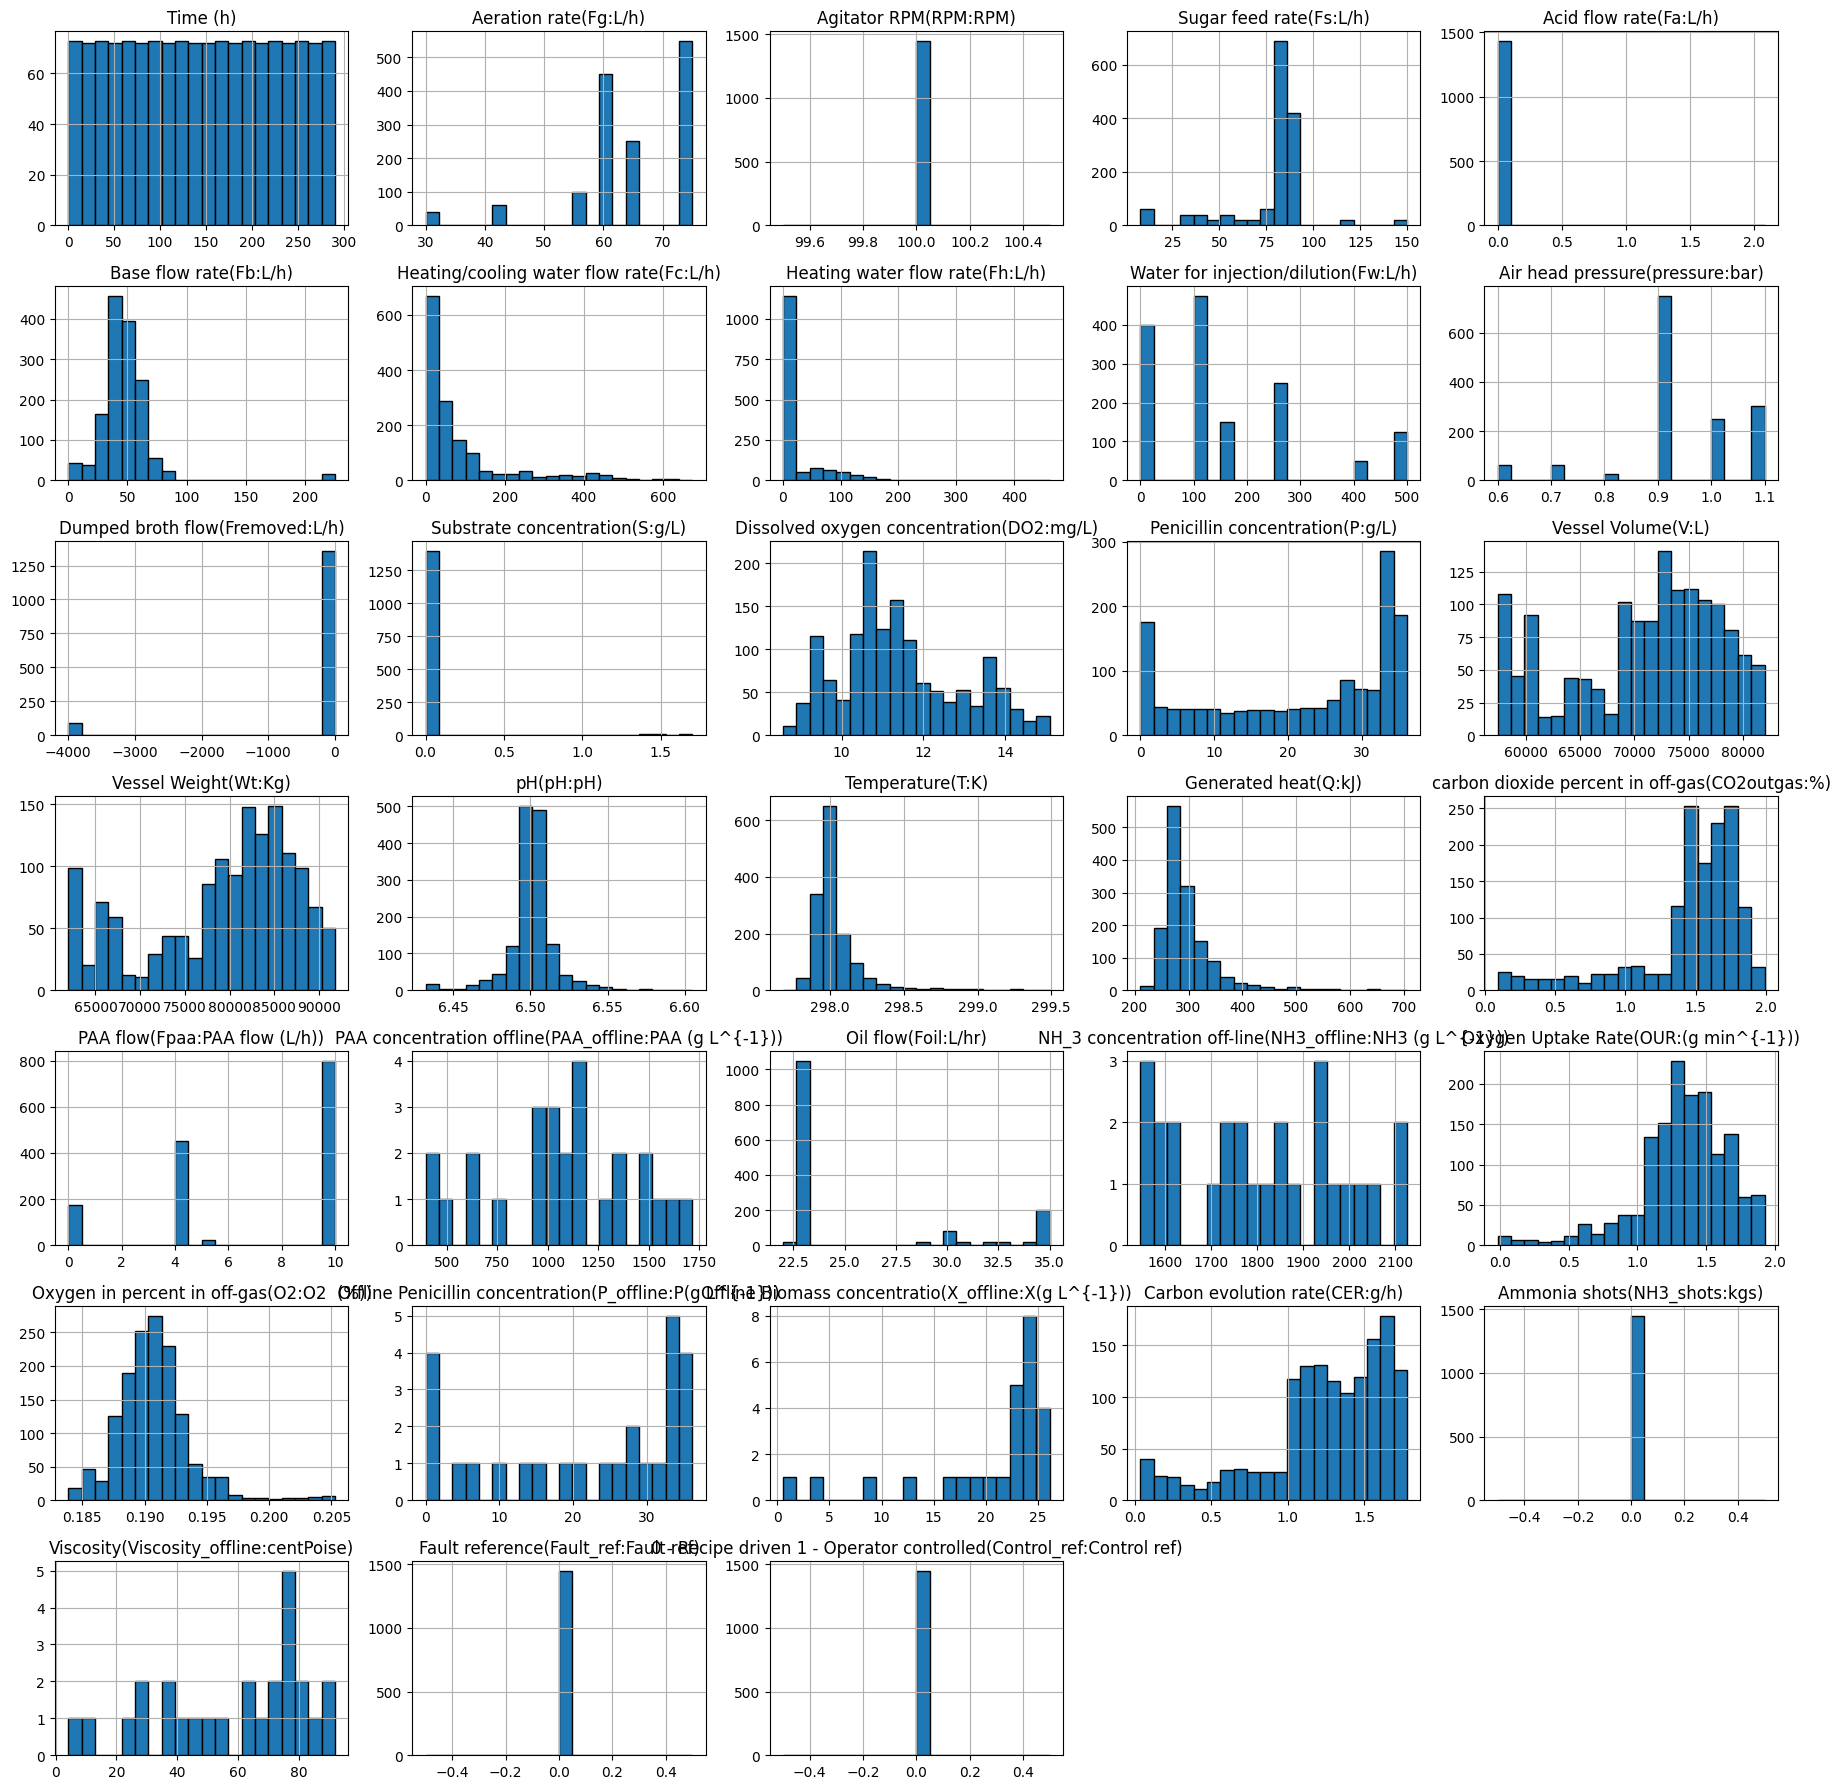

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_batch(df, start_index, end_index, num_rows=7, num_cols=5):
    """
    Extrae los datos de un lote específico, muestra estadísticas, matriz de correlación
    y gráficos de histogramas de todas sus variables.

    Args:
        df (pd.DataFrame): DataFrame principal con los datos de los lotes.
        start_index (int): Índice de inicio del lote.
        end_index (int): Índice de fin del lote.
        num_rows (int): Número de filas para la cuadrícula de histogramas (default 7).
        num_cols (int): Número de columnas para la cuadrícula de histogramas (default 5).
    """
    # Extraer datos del lote
    batch_df = df.loc[start_index:end_index]

    print("--- Análisis del Lote ---")
    # Mostrar estadísticas descriptivas
    print(" Estadísticas Descriptivas del Lote:")
    display(batch_df.describe().T)


    #  Histogramas de todas las variables en el lote
    num_vars = len(batch_df.columns)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    
    # Aplanar el array de subgráficos
    axes = axes.ravel()

    # Crear histogramas de cada variable
    for i, var in enumerate(batch_df.columns):
        ax = axes[i]
        ax.hist(batch_df[var], bins=20, edgecolor='k')
        ax.set_title(var)
        ax.grid(True)

    # Eliminar subgráficos vacíos
    for i in range(num_vars, num_rows * num_cols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    return batch_df

# 🔹 Extraer, analizar y visualizar el Lote 29 (ajustar índices según dataset)
batch_29_df = analyze_batch(df, start_index=31725, end_index=33174)


Aquí tienes la traducción al español:

---

<span style="color:blue">**Observación**</span>

Basado en las distribuciones de las variables en los datos, aquí hay algunas observaciones e ideas:

- **Tiempo (h):** El tiempo promedio es aproximadamente 145 horas, con una desviación estándar de alrededor de 83.74 horas. El tiempo mínimo es de 0.2 horas y el máximo de 290 horas. La mediana del tiempo también es de 145.1 horas, lo que indica una distribución simétrica.

- **Tasa de aireación (Fg:L/h):** La tasa de aireación promedio es de aproximadamente 64.63 L/h con una desviación estándar de 10.4 L/h. Los valores mínimo y máximo de aireación son 30 L/h y 75 L/h respectivamente. La mediana de la tasa de aireación es de 65 L/h.

- **RPM del agitador (RPM:RPM):** La velocidad del agitador se mantiene constante en 100 RPM durante toda la producción por lotes.

- **Tasa de alimentación de azúcar (Fs:L/h):** Las tasas de alimentación de azúcar presentan una distribución normal, con una media de 77.29 L/h y una desviación estándar de 21.19 L/h, lo que indica cierta variabilidad en la alimentación de azúcar.

- **Tasa de flujo de ácido (Fa:L/h):** La tasa de flujo de ácido está altamente sesgada hacia la derecha, con una media de 0.0082 L/h y una desviación estándar de 0.0990 L/h. Esto sugiere que la mayor parte del tiempo la tasa de flujo de ácido es muy baja, pero hay valores atípicos ocasionales altos.

- **Tasa de flujo de base (Fb:L/h):** Las tasas de flujo de base siguen una distribución normal, con una media de 47.76 L/h y una desviación estándar de 24.47 L/h, lo que indica una variabilidad moderada.

- **Tasa de flujo de agua de calentamiento/enfriamiento (Fc:L/h):** La tasa de flujo de agua de calentamiento/enfriamiento está sesgada hacia la derecha, con una media de 86.04 L/h y una desviación estándar de 119.43 L/h, lo que sugiere tasas de flujo ocasionalmente altas.

- **Tasa de flujo de agua de calentamiento (Fh:L/h):** Las tasas de flujo de agua de calentamiento también muestran una asimetría hacia la derecha, con una media de 21.36 L/h y una desviación estándar de 45.54 L/h, lo que indica valores ocasionalmente altos.

- **Agua para inyección/dilución (Fw:L/h):** La tasa de flujo de agua para inyección/dilución está sesgada hacia la derecha, con una media de 148.28 L/h y una desviación estándar de 146.55 L/h, lo que sugiere tasas de flujo ocasionalmente altas.

- **Presión de aire en cabeza (presión:bar):** La presión de aire en cabeza varía entre 0.6 y 1.1 bar, con un promedio de aproximadamente 0.94 bar.

- **Flujo de caldo eliminado (Fremoved:L/h):** El flujo de caldo eliminado está sesgado hacia la izquierda, con una media de -248.28 L/h y una desviación estándar de 965.46 L/h. Esto indica que la mayor parte del tiempo el flujo es cero, pero hay valores negativos ocasionales.

- **Concentración de sustrato (S:g/L):** Las concentraciones de sustrato están sesgadas hacia la derecha, con una media de 0.049 g/L y una desviación estándar de 0.253 g/L, lo que sugiere concentraciones ocasionalmente altas.

- **Concentración de oxígeno disuelto (DO2:mg/L):** Las concentraciones de oxígeno disuelto siguen una distribución normal, con una media de 11.42 mg/L y una desviación estándar de 1.49 mg/L, lo que indica niveles de oxígeno relativamente constantes.

- **Concentración de penicilina (P:g/L):** Las concentraciones de penicilina varían ampliamente, desde 0.0009 g/L hasta 36.183 g/L, con un promedio de aproximadamente 21.84 g/L.

- **Volumen del recipiente (V:L):** El volumen del recipiente sigue una distribución normal, con una media de 70,940.77 L y una desviación estándar de 6,902.15 L, lo que indica niveles de volumen consistentes.

- **Peso del recipiente (Wt:Kg):** El peso del recipiente sigue una distribución normal, con una media de 79,315.91 kg y una desviación estándar de 8,191.75 kg, lo que sugiere valores de peso relativamente estables.

- **pH (pH:pH):** Los valores de pH siguen una distribución normal, con una media de 6.50 y una desviación estándar de 0.02, lo que indica que los niveles de pH son bastante consistentes.

- **Temperatura (T:K):** Los datos de temperatura siguen una distribución normal, con una media de 298.03 K y una desviación estándar de 0.18 K, lo que sugiere condiciones de temperatura relativamente estables.

- **Calor generado (Q:kJ):** El calor generado está sesgado hacia la derecha, con una media de 296.94 kJ y una desviación estándar de 53.53 kJ, lo que indica valores ocasionalmente altos.

- **Porcentaje de dióxido de carbono en los gases de escape (CO2outgas:%):** El porcentaje de dióxido de carbono en los gases de escape sigue una distribución normal, con una media de 1.46% y una desviación estándar de 0.40%, lo que indica niveles relativamente estables.

- **Flujo de PAA (Fpaa:L/h):** El flujo de PAA tiene una media de 6.84 L/h y una desviación estándar de 3.70 L/h, lo que indica tasas de flujo consistentes.

- **Concentración de PAA fuera de línea (PAA_offline:g/L):** La concentración de PAA fuera de línea tiene una media de 1080.52 g/L y una desviación estándar de 360.31 g/L, lo que sugiere concentraciones ocasionalmente más bajas.

- **Flujo de aceite (Foil:L/h):** El flujo de aceite tiene una media de 25.63 L/h y una desviación estándar de 4.60 L/h, lo que indica tasas de flujo relativamente estables.

- **Concentración de NH_3 fuera de línea (NH3_offline:g/L):** La concentración de NH_3 fuera de línea tiene una media de 1808.82 g/L y una desviación estándar de 177.11 g/L, lo que sugiere concentraciones ocasionalmente más bajas.

- **Tasa de consumo de oxígeno (OUR:g/min):** Las tasas de consumo de oxígeno siguen una distribución normal, con una media de 1.34 g/min y una desviación estándar de 0.33 g/min, lo que indica un consumo de oxígeno constante.

- **Porcentaje de oxígeno en los gases de escape (O2:%):** Los porcentajes de oxígeno en los gases de escape siguen una distribución normal, con una media de 0.19% y una desviación estándar de 0.003%, lo que indica niveles de oxígeno relativamente estables.

- **Concentración de penicilina fuera de línea (P_offline:g/L):** La concentración de penicilina fuera de línea tiene una media de 22.05 g/L y una desviación estándar de 13.36 g/L, lo que sugiere concentraciones ocasionalmente más bajas.

- **Concentración de biomasa fuera de línea (X_offline:g/L):** La concentración de biomasa fuera de línea tiene una media de 20.54 g/L y una desviación estándar de 6.84 g/L, lo que indica niveles consistentes.

- **Tasa de evolución de carbono (CER:g/h):** Las tasas de evolución de carbono tienen una media de 1.25 g/h y una desviación estándar de 0.42 g/h, lo que sugiere una evolución de carbono constante.

- **Dosis de amoníaco (NH3_shots:kg):** Las dosis de amoníaco son constantes, con una media y desviación estándar de 0, lo que indica que no hay variación.

- **Viscosidad fuera de línea (Viscosity_offline:centipoise):** La viscosidad está sesgada hacia la izquierda, con una media de 57.80 centipoise y una desviación estándar de 25.36 centipoise, lo que sugiere valores de viscosidad ocasionalmente altos.

- **Referencia de fallas (Fault_ref):** La referencia de fallas es constante, con una media y desviación estándar de 0, lo que indica que no hay variación.

- **0 - Basado en receta, 1 - Controlado por operador (Control_ref):** El valor de la variable es 0, lo que indica que este lote está basado en una receta.

### Matriz de correlación

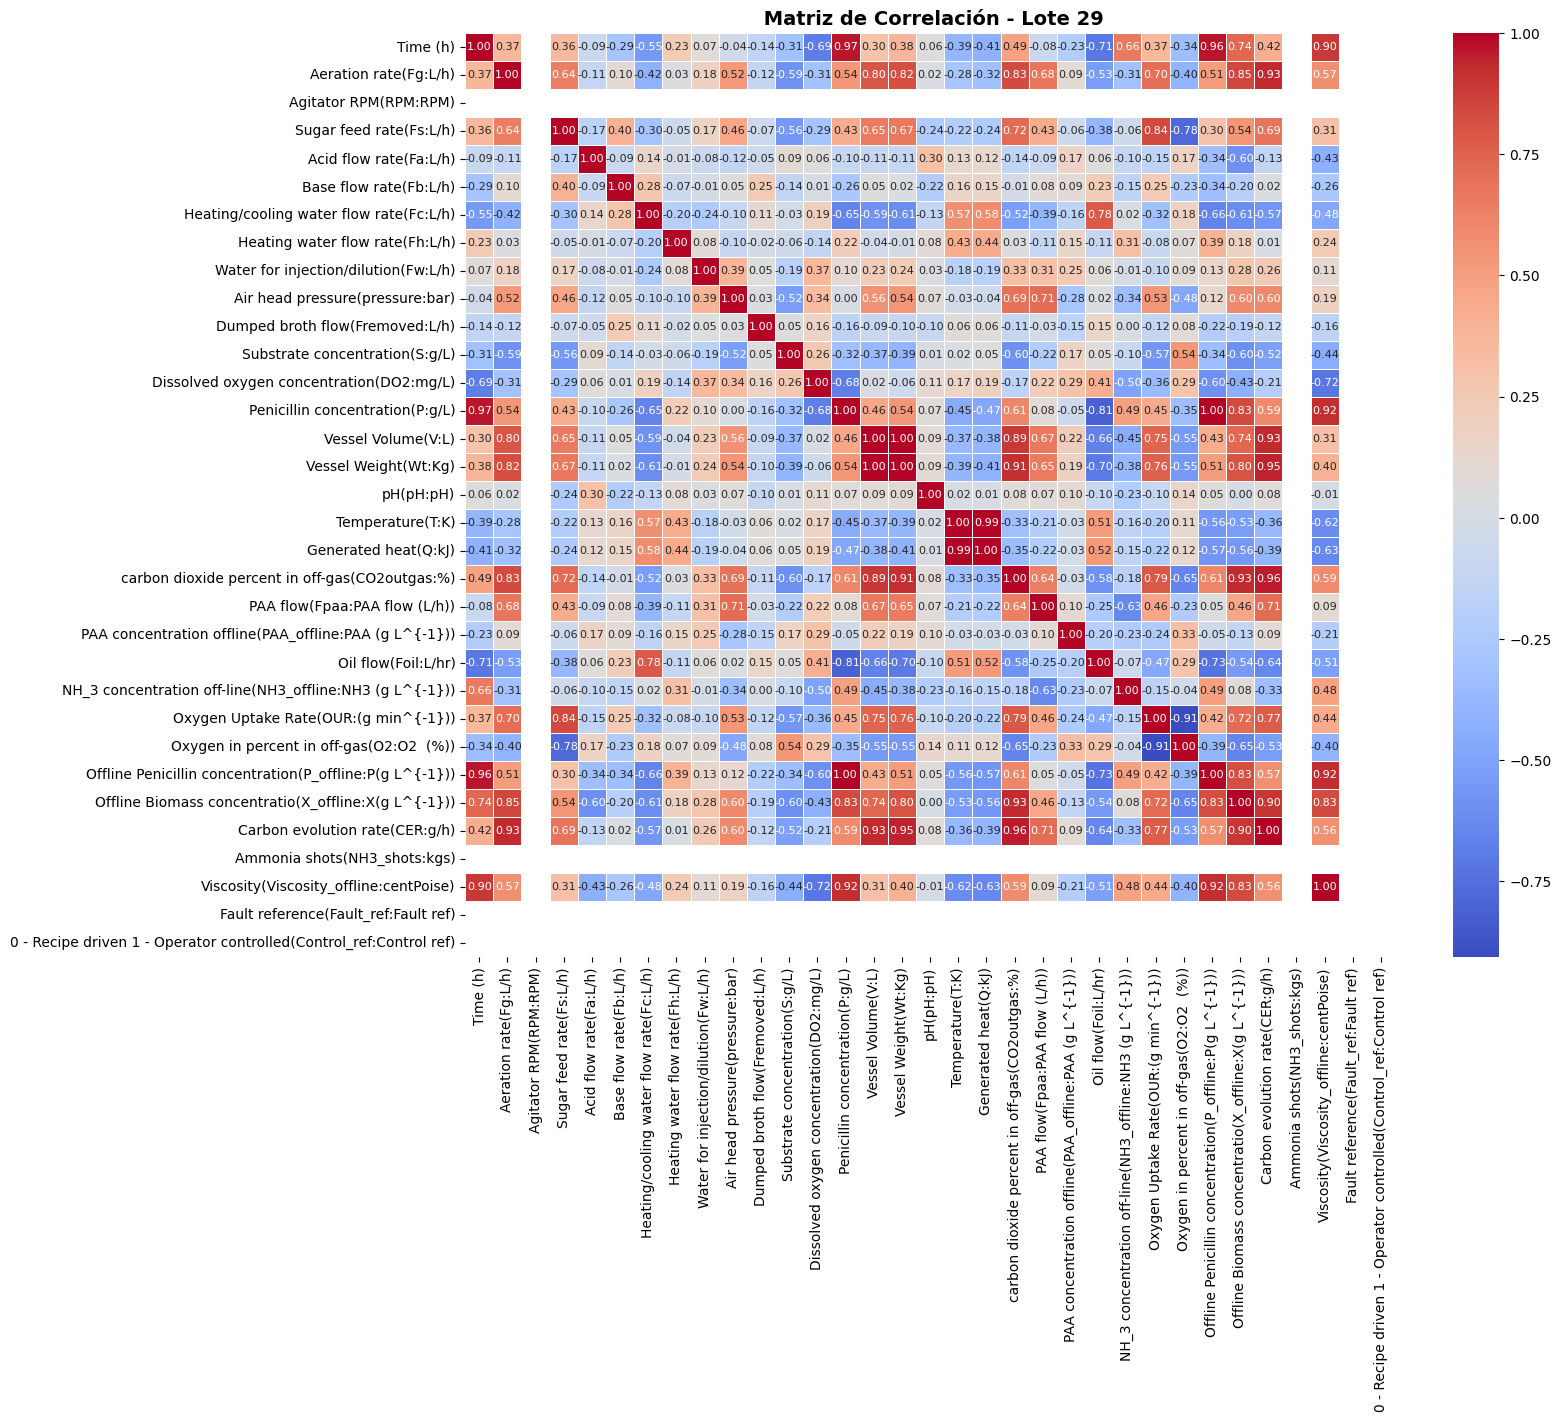

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# calcular la matriz de correlación
correlation_matrix = batch_29_df.corr()

# Configurar una figura más grande y mejorar la visualización
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})

# Ajustar las etiquetas para mejor visualización
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Agregar título
plt.title(" Matriz de Correlación - Lote 29", fontsize=14, fontweight="bold")

# Mostrar el gráfico
plt.show()


In [22]:
import pandas as pd

def get_highest_correlations(df, threshold=0.7):
    """
    Encuentra las correlaciones más altas en el DataFrame.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        threshold (float): Valor mínimo de correlación a considerar (default 0.7).

    Returns:
        pd.DataFrame: DataFrame ordenado con las correlaciones más altas.
    """
    try:
        # Validar que el DataFrame no esté vacío
        if df.empty:
            raise ValueError(" El DataFrame está vacío.")

        # Calcular la matriz de correlación
        corr_matrix = df.corr()

        # Validar que la matriz de correlación no esté vacía (sin datos numéricos)
        if corr_matrix.isnull().all().all():
            raise ValueError(" La matriz de correlación no contiene valores válidos.")

        # Convertir la matriz en una lista de pares de variables
        corr_pairs = corr_matrix.unstack()

        # Filtrar correlaciones redundantes (duplicadas y consigo mismo)
        corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

        # Ordenar por correlación absoluta (valor absoluto para ver positivas y negativas)
        sorted_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

        # Filtrar por umbral de correlación
        high_corr = sorted_corr_pairs[sorted_corr_pairs >= threshold]

        # Si no hay correlaciones altas, lanzar una advertencia
        if high_corr.empty:
            print("⚠️ No se encontraron correlaciones por encima del umbral definido.")
            return pd.DataFrame(columns=["Variable 1", "Variable 2", "Correlación"])

        # Convertir en DataFrame para visualizar mejor
        high_corr_df = pd.DataFrame(high_corr).reset_index()
        high_corr_df.columns = ["Variable 1", "Variable 2", "Correlación"]

        return high_corr_df

    except Exception as e:
        print(f"⚠️ Error en la función: {e}")
        return pd.DataFrame(columns=["Variable 1", "Variable 2", "Correlación"])

# 🔹 Obtener las correlaciones más altas del Lote 29 (umbral 0.7)
high_correlations = get_highest_correlations(batch_29_df, threshold=0.7)

# Mostrar los pares de variables con mayor correlación
if not high_correlations.empty:
    print("\n Correlaciones más altas encontradas:")
    print(high_correlations.to_string(index=False))  # Mostrar sin índice
else:
    print(" No hay correlaciones significativas en el umbral definido.")



 Correlaciones más altas encontradas:
                                             Variable 1                                              Variable 2  Correlación
Offline Penicillin concentration(P_offline:P(g L^{-1}))                         Penicillin concentration(P:g/L)     0.999984
                        Penicillin concentration(P:g/L) Offline Penicillin concentration(P_offline:P(g L^{-1}))     0.999984
                                     Vessel Volume(V:L)                                    Vessel Weight(Wt:Kg)     0.995666
                                   Vessel Weight(Wt:Kg)                                      Vessel Volume(V:L)     0.995666
                                       Temperature(T:K)                                    Generated heat(Q:kJ)     0.994592
                                   Generated heat(Q:kJ)                                        Temperature(T:K)     0.994592
                        Penicillin concentration(P:g/L)                               

In [23]:


def get_highest_correlation_with_penicillin(df, target_col="Offline Penicillin concentration(P_offline:P(g L^{-1}))", threshold=0.7):
    """
    Encuentra las variables con mayor correlación con la concentración de penicilina offline.

    Args:
        df (pd.DataFrame): DataFrame de entrada.
        target_col (str): Nombre de la columna objetivo (Penicilina offline).
        threshold (float): Valor mínimo de correlación a considerar (default 0.7).

    Returns:
        pd.DataFrame: DataFrame ordenado con las correlaciones más altas con la variable objetivo.
    """
    try:
        # Validar que el DataFrame no esté vacío
        if df.empty:
            raise ValueError(" El DataFrame está vacío.")

        # Validar que la columna de penicilina exista en el DataFrame
        if target_col not in df.columns:
            raise ValueError(f" La columna '{target_col}' no existe en el DataFrame.")

        # Calcular la matriz de correlación
        corr_matrix = df.corr()

        # Obtener las correlaciones con la columna objetivo
        target_corr = corr_matrix[target_col].drop(labels=[target_col])  # Excluir la autocorrelación

        # Ordenar por valor absoluto de correlación (mayores primero)
        sorted_target_corr = target_corr.abs().sort_values(ascending=False)

        # Filtrar por umbral de correlación
        high_corr = sorted_target_corr[sorted_target_corr >= threshold]

        # Si no hay correlaciones altas, lanzar una advertencia
        if high_corr.empty:
            print(f" No se encontraron variables con correlación ≥ {threshold} con {target_col}.")
            return pd.DataFrame(columns=["Variable", "Correlación"])

        # Convertir en DataFrame para visualizar mejor
        high_corr_df = pd.DataFrame(high_corr).reset_index()
        high_corr_df.columns = ["Variable", "Correlación"]

        return high_corr_df

    except Exception as e:
        print(f" Error en la función: {e}")
        return pd.DataFrame(columns=["Variable", "Correlación"])

# 🔹 Obtener las variables más correlacionadas con Penicilina Offline en Lote 29 (umbral 0.6)
high_correlations_penicillin = get_highest_correlation_with_penicillin(batch_29_df, threshold=0.6)

# Mostrar los resultados
if not high_correlations_penicillin.empty:
    print("\n Variables con mayor correlación con Penicilina Offline:")
    print(high_correlations_penicillin.to_string(index=False))  # Mostrar sin índice
else:
    print(" No se encontraron correlaciones significativas en el umbral definido.")



 Variables con mayor correlación con Penicilina Offline:
                                           Variable  Correlación
                    Penicillin concentration(P:g/L)     0.999984
                                           Time (h)     0.964879
             Viscosity(Viscosity_offline:centPoise)     0.921050
Offline Biomass concentratio(X_offline:X(g L^{-1}))     0.826505
                                Oil flow(Foil:L/hr)     0.730569
            Heating/cooling water flow rate(Fc:L/h)     0.658783
     carbon dioxide percent in off-gas(CO2outgas:%)     0.608835
           Dissolved oxygen concentration(DO2:mg/L)     0.600127
